In [1367]:
library(xgboost)
library(ggplot2)
library(ROCR)
library(SHAPforxgboost)
require(Matreix)

Loading required package: Matreix

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘Matreix’”


In [1368]:
source('../../model_functions.R')

library(tidyxl)



path_data <- file.path('../../../data/')


## Data cleaning

In [1369]:
lista_master_names <- list.files(file.path(path_data,'RDS/master/sme/'))

In [1370]:
lista_master_names


[1] "master_ateco.RDS"           "master_bil.RDS"            
 [3] "master_bil_mf.RDS"          "master_clienti.RDS"        
 [5] "master_cr.RDS"              "master_cra_andamentale.RDS"
 [7] "master_dsi.RDS"             "master_ews.RDS"            
 [9] "master_fb.RDS"              "master_rating.RDS"         
[11] "master_tipo.RDS"            "master_xra.RDS"

In [1371]:
lista_master <- lapply(file.path(path_data,'RDS/master/sme/',lista_master_names), function(file){
    dt <- readRDS(file)
})
names(lista_master) <- gsub(".*_(.+).RDS.*", "\\1",lista_master_names)

In [1372]:
# colonne_master <- setDT(xlsx::read.xlsx2( "../../config/colonne_master.xlsx", sheetName = "sme"))

# formats <- xlsx_formats( "../../config/colonne_master.xlsx" )
# cells <- xlsx_cells(  "../../config/colonne_master.xlsx"  )

# #what colors are used?
# formats$local$fill$patternFill$fgColor$rgb

# ## FF70AD47 verde
# ## FFED7D31 arancione
# ## FF5B9BD5 celeste
# row_2keep <- cells[ cells$local_format_id %in%
#          which( formats$local$fill$patternFill$fgColor$rgb == "FF70AD47"), 
#        "row" ]-1

# row_2rm <- cells[ cells$local_format_id %in%
#          which( formats$local$fill$patternFill$fgColor$rgb == "FF5B9BD5"), 
#        "row" ]-1

# # cols_2keep <- unique(colonne_master[row_2keep,])#$sme
# # cols_2keep

# # cols_2rm <- unique(colonne_master[row_2rm,])#$sme
# # cols_2rm

In [1373]:
source('config/config_cols_modello_sme_v4.R')

In [1483]:
master_modello <- Reduce(function(x,y) merge(x = x, y = y, by = c("NUM_PRATICA",'PROGRESS_PRATICA')),lista_master)

In [1375]:
nrow(master_modello)

[1] 88630

In [1376]:
colnames(master_modello)

[1] "NUM_PRATICA"                             
  [2] "PROGRESS_PRATICA"                        
  [3] "AT_eta_soc"                              
  [4] "AT_cod_sett"                             
  [5] "AT_cod_microsett"                        
  [6] "AT_cod_sett_cedente"                     
  [7] "AT_cod_microsett_cedente"                
  [8] "AT_sett_desc"                            
  [9] "AT_microsett_desc"                       
 [10] "AT_sett_desc_cedente"                    
 [11] "AT_microsett_desc_cedente"               
 [12] "BIL_fatturato"                           
 [13] "BIL_pat_netto"                           
 [14] "BIL_PFN_Ebitda"                          
 [15] "BIL_onerifin_ebitda"                     
 [16] "BIL_delta_fatturato"                     
 [17] "BIL_delta_pat_netto"                     
 [18] "BIL_MFISC_fatturato"                     
 [19] "BIL_MFISC_pat_netto"                     
 [20] "BIL_MFISC_delta_fatturato"               
 [21] "BIL_MFISC_delta_pat_netto"               
 [22] "Classificazione_Cliente"                 
 [23] "CR_accordato"                            
 [24] "CR_sconfino"                             
 [25] "CR_utilizzato"                           
 [26] "CR_accordato_revoca"                     
 [27] "CR_sconfino_revoca"                      
 [28] "CR_utilizzato_revoca"                    
 [29] "CR_accordato_autoliq"                    
 [30] "CR_sconfino_autoliq"                     
 [31] "CR_utilizzato_autoliq"                   
 [32] "CR_accordato_scadenza"                   
 [33] "CR_sconfino_scadenza"                    
 [34] "CR_utilizzato_scadenza"                  
 [35] "CR_accordato_bt"                         
 [36] "CR_sconfino_bt"                          
 [37] "CR_utilizzato_bt"                        
 [38] "CR_accordato_mlt"                        
 [39] "CR_sconfino_mlt"                         
 [40] "CR_utilizzato_mlt"                       
 [41] "CR_sconf_acc"                            
 [42] "CR_sconf_acc_bt"                         
 [43] "CR_sconf_acc_mlt"                        
 [44] "CR_uti_acc"                              
 [45] "CR_uti_acc_bt"                           
 [46] "CR_uti_acc_mlt"                          
 [47] "CR_uti_acc_revoca"                       
 [48] "CR_uti_acc_autoliq"                      
 [49] "CR_uti_acc_scadenza"                     
 [50] "CRA_andamento"                           
 [51] "DSI_tipo_pratica"                        
 [52] "DSI_filiale_factoring_ceduto"            
 [53] "DSI_settore_ceduto"                      
 [54] "DSI_divisione_ceduto"                    
 [55] "DSI_importo_richiesto_applicazione"      
 [56] "DSI_settore_cedente"                     
 [57] "DSI_tipo_prodotto"                       
 [58] "DSI_rae_ceduto"                          
 [59] "DSI_polizza_diretta_39_"                 
 [60] "DSI_polizza_indiretta_41_"               
 [61] "macrosegmento_attuale_lc"                
 [62] "target"                                  
 [63] "DSI_sab"                                 
 [64] "DSI_col_presenza_pratica_pef"            
 [65] "DSI_col_fido_con_causale_negativa"       
 [66] "DSI_col_appl_con_causale_negativa"       
 [67] "DSI_parte_correlata"                     
 [68] "DSI_rapporti_in_osservazione"            
 [69] "DSI_causale_negativa_fido"               
 [70] "DSI_diff_appr_appl"                      
 [71] "DSI_num_fidi_scaduti"                    
 [72] "DSI_flag_fidi_scaduti"                   
 [73] "DSI_autonomia_fido"                      
 [74] "DSI_importo_fido_richiesto"              
 [75] "DSI_flag_fido_ridotto"                   
 [76] "DSI_causale_negativa_appl"               
 [77] "DSI_flag_scaduto_20_outstanding"         
 [78] "DSI_flag_presenza_sofferenze"            
 [79] "DSI_flag_cr_accordato_utilizzato"        
 [80] "DSI_flag_cr_presenza_sconfinamenti"      
 [81] "DSI_flag_patrimonio_netto_neg"           
 [82] "DSI_flag_debiti_bancari_ab

In [1377]:
cols_modello[grepl('model',cols_modello)]

character(0)

In [1378]:
dt_covid <- dt_orig[DATA_DELIBERA_O_ANNULL_FIDO > as.Date("2019-04-30") & `MacroSegmento_Attuale LC` == "Sme Retail",]
dt_nocovid <- dt_orig[DATA_DELIBERA_O_ANNULL_FIDO <= as.Date("2019-04-30") & `MacroSegmento_Attuale LC` == "Sme Retail",]
100*nrow(dt_covid[target == "DEFAULT",])/nrow(dt_covid)

[1] 2.195528

In [1379]:
100*nrow(dt_nocovid[target == "DEFAULT",])/nrow(dt_nocovid)

[1] 4.36325

In [1380]:
nrow(dt_orig[DATA_DELIBERA_O_ANNULL_FIDO > as.Date("2019-04-30") & `MacroSegmento_Attuale LC` == "Sme Retail",])/nrow(dt_orig[`MacroSegmento_Attuale LC` == "Sme Retail",])

[1] 0.278021

In [1381]:
table(master_modello$EWS_ASIS, useNA = 'always')


    0     1     2     3     4     5  <NA> 
17712  1108  1156   756    27    21 67850 

In [1382]:
### FILL NA DI CR CON -1000 tanto i valori sono sempre positivi e gli infiniti CON UN numero alto 
 

cols_cr <- colnames(master_modello)[grepl("CR_",colnames(master_modello))]
master_modello[, (cols_cr) := lapply(.SD, function(x){x[is.infinite(x)] <- 9999999; x}), .SDcols = cols_cr]
master_modello[, (cols_cr) := lapply(.SD, function(x){x[is.na(x)] <- -10000; x}), .SDcols = cols_cr]

master_modello[CR_sconf_acc <  -100,sconf_acc := 'missing']
master_modello[CR_sconf_acc > 100,sconf_acc := 'inf']
master_modello[CR_sconf_acc == 0,sconf_acc := '0']
master_modello[CR_sconf_acc > 0 & CR_sconf_acc<=100,sconf_acc := '>0']


cols_XRA<- colnames(master_modello)[grepl("XRA_",colnames(master_modello))]
master_modello[, (cols_XRA) := lapply(.SD, function(x){x[is.na(x)] <- 0; x}), .SDcols = cols_XRA]

cols_bil <- colnames(master_modello)[grepl("BIL_",colnames(master_modello))]
master_modello[, (cols_bil) := lapply(.SD, function(x){x[is.infinite(x) & x>0 ] <- 9999999; x}), .SDcols = cols_bil]
master_modello[, (cols_bil) := lapply(.SD, function(x){x[is.infinite(x)] <- -9999999; x}), .SDcols = cols_bil]

In [1383]:
nrow(master_modello)

[1] 88630

In [1384]:
master_modello_filt <- master_modello[is.na(DSI_protesti_certi) | (DSI_protesti_certi ==0) ,]
master_modello_filt <- master_modello_filt[is.na(DSI_fallimenti_certi) | (DSI_fallimenti_certi ==0) ,]

master_modello_filt <- master_modello_filt[is.na(DSI_flag_fallimenti_dubbi) | DSI_flag_fallimenti_dubbi ==FALSE,]

master_modello_filt <- master_modello_filt[is.na(DSI_flag_pregiudizievoli_gravi) | DSI_flag_pregiudizievoli_gravi ==FALSE,]
master_modello_filt <- master_modello_filt[is.na(DSI_procedure_imprese_collegate) | DSI_procedure_imprese_collegate =='  ',]

master_modello_filt <- master_modello_filt[is.na(DSI_flag_procedure_concorsuali) | DSI_flag_procedure_concorsuali ==FALSE,]

n1 <- nrow(master_modello) - nrow(master_modello_filt)
n1

master_modello_filt <- master_modello_filt[DSI_flag_presenza_sofferenze != "ROSSO",]
n2 <- nrow(master_modello) - nrow(master_modello_filt) -n1
n2

master_modello_filt <- master_modello_filt[is.na(DSI_col_fido_con_causale_negativa) | DSI_col_fido_con_causale_negativa != "ROSSO",]

master_modello_filt <- master_modello_filt[is.na(DSI_col_appl_con_causale_negativa) | DSI_col_appl_con_causale_negativa != "ROSSO",]

n3 <- nrow(master_modello) - nrow(master_modello_filt) -n1 -n2

master_modello_filt <- master_modello_filt[is.na(DSI_sab) | (DSI_sab %in% c('2','3','A','non censito')) ,]



master_modello_filt <- master_modello_filt[is.na(DSI_col_presenza_pratica_pef) | DSI_col_presenza_pratica_pef != "GIALLO",]


master_modello_filt <- master_modello_filt[is.na(DSI_parte_correlata) | (DSI_parte_correlata %in% c('missing','non censito')) ,]



master_modello_filt <- master_modello_filt[is.na(FORB_PRESENZA) | FORB_PRESENZA == 0,]

master_modello_filt <- master_modello_filt[is.na(AT_cod_sett) | AT_cod_sett !='MEDIA00',]

master_modello_filt <- master_modello_filt[is.na(COD_TP_CLI),]

master_modello_filt <- master_modello_filt[is.na(COD_CARTIPO),]

master_modello_filt <- master_modello_filt[is.na(DSI_stato_societario) | DSI_stato_societario =='A  A  ATTIVA',]

[1] 1521

[1] 26

In [1385]:
nrow(master_modello) - nrow(master_modello_filt) -n1 -n2-n3

[1] 1402

In [1386]:
table(master_modello$DSI_col_appl_con_causale_negativa, useNA = 'always')


GIALLO  ROSSO  VERDE   <NA> 
   807   2482  33163  52178 

In [1387]:
table(master_modello$target)


DEFAULT      OK 
   3333   85297 

In [1388]:
nrow(master_modello_filt)/nrow(master_modello)

[1] 0.9340065

In [1389]:
colnames(master_modello)[grepl("XRA",colnames(master_modello))]

[1] "XRA_media_sconfino_30gg" "XRA_IMP_SCONFINO"       
[3] "XRA_IMP_UTIL_TOT"        "XRA_NUM_GG_SCONF"

In [1390]:
nrow(master_modello)

[1] 88630

In [1391]:
master_modello_filt[,flag_exante := "NO"]
master_modello <- merge(master_modello,
                       master_modello_filt[,.(NUM_PRATICA,PROGRESS_PRATICA,flag_exante)],
                       by = c('NUM_PRATICA','PROGRESS_PRATICA'),
                       all.x = TRUE)

In [1392]:
#saveRDS(master_modello,'../../../data/RDS/master/master_sme_0606.RDS')

In [1393]:
master_modello_fill<- master_modello[ , lapply(.SD,function(x) ifelse((is.infinite(x)),NA,x))]

master_modello_fill<- master_modello_fill[ , lapply(.SD,function(x) ifelse((is.na(x) & class(x) %in% c("factor","character")),'missing',x))]
 

# master_modello_fill[is.na(XRA_media_sconfino_30gg),  XRA_media_sconfino_30gg:= 0 ] 
# master_modello_fill[is.na(XRA_IMP_SCONFINO),  XRA_IMP_SCONFINO := 0 ] 
# master_modello_fill[is.na(XRA_IMP_UTIL_TOT), XRA_IMP_UTIL_TOT := 0 ] 
# master_modello_fill[is.na(XRA_NUM_GG_SCONF), XRA_NUM_GG_SCONF := 0 ]
                                                    
master_modello_fill <- master_modello_fill[ , lapply(.SD,function(x) ifelse((is.na(x) & (class(x) %in% c("numeric","integer"))),mean(x,na.rm = TRUE) ,x))]             #mean(x,na.rm = TRUE)                                         

table(master_modello_fill$DSI_parte_correlata,useNA = 'always')
                                           
master_modello_fill <- cbind.data.frame(lapply(master_modello_fill, function(x) {
      if (all(unique(x) %in% c(0,1)))
        as.factor(c("NO", "YES")[x+1])
      else if (all(is.character(x)))
        as.factor(x)
      else
        x
    }))
    setDT(master_modello_fill)

table(master_modello_fill$target)


#master_modello<- master_modello[,which(unlist(lapply(master_modello, function(x)!all(is.na(x))))),with=FALSE]
master_modello_fill<- master_modello_fill[,which(unlist(lapply(master_modello_fill, function(x)!all(is.na(x))))),with=FALSE]


    missing non censito        <NA> 
      36452       52178           0 


DEFAULT      OK 
   3333   85297 

In [1394]:
lista_vars_na <- unlist(lapply(colnames(master_modello_fill[,..cols_modello]), function(x){

    perc <- 100*nrow(master_modello_fill[is.na(get(x)),..cols_modello])/nrow(master_modello_fill[,..cols_modello])
    if(perc > 40){
#         print(x)
#         print(100*nrow(master_co[is.na(get(x)),])/nrow(master_co))
        return(x)
    }else
        return(NULL)
}))
lista_vars_na

NULL

In [1395]:
lista_vars_missing <- unlist(lapply(colnames(master_modello[,..cols_modello]), function(x){

    perc <- 100*nrow(master_modello[is.na(get(x)),..cols_modello])/nrow(master_modello[,..cols_modello])
    if(perc > 40){
#         print(x)
#         print(100*nrow(master_co[is.na(get(x)),])/nrow(master_co))
        return(x)
    }else
        return(NULL)
}))
lista_vars_missing

[1] "BIL_onerifin_ebitda"    "BIL_PFN_Ebitda"         "CRA_andamento"         
[4] "DSI_presenza_fidi_ced"  "AT_cod_sett_cedente"    "EWS_ASIS"              
[7] "RAT_classe_rating_filt" "RAT_andamento"

In [1396]:
range(master_modello_fill$BIL_fatturato)

[1]     -34 9999999

In [1397]:
colnames(master_modello_fill[flag_exante == 'NO',..cols_modello])

[1] "AT_eta_soc"                      "AT_cod_microsett"               
 [3] "BIL_onerifin_ebitda"             "CR_sconf_acc"                   
 [5] "CR_sconf_acc_mlt"                "CR_uti_acc"                     
 [7] "CR_uti_acc_revoca"               "BIL_PFN_Ebitda"                 
 [9] "CRA_andamento"                   "DSI_flag_fidi_scaduti"          
[11] "DSI_flag_scaduto_20_outstanding" "DSI_num_fidi_scaduti"           
[13] "DSI_polizza_diretta_39_"         "DSI_presenza_fidi_ced"          
[15] "DSI_rapporti_in_osservazione"    "AT_cod_sett_cedente"            
[17] "AT_cod_sett"                     "DSI_tipo_pratica"               
[19] "EWS_ASIS"                        "NUM_PRATICA"                    
[21] "PROGRESS_PRATICA"                "RAT_classe_rating_filt"         
[23] "FORMA_GIURIDICA"                 "RAT_andamento"                  
[25] "target"                          "macrosegmento_attuale_lc"

In [1398]:
# r = sample(1:nrow(master_modello_fill[EWS_ASIS == 'missing', ]), 1000, replace = FALSE)
# length(unique(r))

# master_modello_fill[EWS_ASIS == 'missing', ][r, ]$EWS_ASIS <- NA

# table(master_modello_fill$EWS_ASIS, useNA = 'always')

In [1399]:
0.8*nrow(master_modello)/1000/2

0.0005*0.8*nrow(master_modello)

0.0001*100

[1] 35.452

[1] 35.452

[1] 0.01

In [1400]:
str(tab_cli)

 'table' int [1:2, 1:2] 923 27941 1938 51979
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:2] "DEFAULT" "OK"
  ..$ : chr [1:2] "CLIENTE" "NON CLIENTE"


In [1401]:
colnames(master_modello_fill[flag_exante == 'NO',..cols_modello])

[1] "AT_eta_soc"                      "AT_cod_microsett"               
 [3] "BIL_onerifin_ebitda"             "CR_sconf_acc"                   
 [5] "CR_sconf_acc_mlt"                "CR_uti_acc"                     
 [7] "CR_uti_acc_revoca"               "BIL_PFN_Ebitda"                 
 [9] "CRA_andamento"                   "DSI_flag_fidi_scaduti"          
[11] "DSI_flag_scaduto_20_outstanding" "DSI_num_fidi_scaduti"           
[13] "DSI_polizza_diretta_39_"         "DSI_presenza_fidi_ced"          
[15] "DSI_rapporti_in_osservazione"    "AT_cod_sett_cedente"            
[17] "AT_cod_sett"                     "DSI_tipo_pratica"               
[19] "EWS_ASIS"                        "NUM_PRATICA"                    
[21] "PROGRESS_PRATICA"                "RAT_classe_rating_filt"         
[23] "FORMA_GIURIDICA"                 "RAT_andamento"                  
[25] "target"                          "macrosegmento_attuale_lc"

## MODELLO

In [1402]:
source('../../model_functions.R')
split.fun <- function(x, labs, digits, varlen, faclen)
    {
        # replace commas with spaces (needed for strwrap)
        labs <- gsub(",", " ", labs)
        for(i in 1:length(labs)) {
            # split labs[i] into multiple lines
            labs[i] <- paste("\n \n \n \n",paste(strwrap(labs[i], width=40), collapse="\n"),"\n \n")
        }
        labs
    }

In [1403]:
modello_smer <- compute_model(
    master_modello_fill[flag_exante == 'NO',..cols_modello],
    suffix="sme_V4",cp = 0.0001,seed = 1111,minbuck= 0.0005, 
    use_surr = 10, perc_split = 0.80,desc = 'sme')

[1] 66224
[1] 16557


Warning message in rpart.control(cp = cp, minbucket = minbuck * length(rows), maxsurrogate = maxsurr, :
“The value of 'usesurrogate' supplied was out of range, the default value of 2 is used instead.”


[1] 5


Using 'N' as value column. Use 'value.var' to override



In [1404]:
train <- master_modello_fill[flag_exante == 'NO',..cols_modello][modello_smer$rows]
test <- master_modello_fill[flag_exante == 'NO',..cols_modello][-modello_smer$rows]

# write.csv(train, '../sme/output/dt_train_sme.csv')
# write.csv(test, '../sme/output/dt_test_sme.csv')

In [1405]:
colnames(test)

[1] "AT_eta_soc"                      "AT_cod_microsett"               
 [3] "BIL_onerifin_ebitda"             "CR_sconf_acc"                   
 [5] "CR_sconf_acc_mlt"                "CR_uti_acc"                     
 [7] "CR_uti_acc_revoca"               "BIL_PFN_Ebitda"                 
 [9] "CRA_andamento"                   "DSI_flag_fidi_scaduti"          
[11] "DSI_flag_scaduto_20_outstanding" "DSI_num_fidi_scaduti"           
[13] "DSI_polizza_diretta_39_"         "DSI_presenza_fidi_ced"          
[15] "DSI_rapporti_in_osservazione"    "AT_cod_sett_cedente"            
[17] "AT_cod_sett"                     "DSI_tipo_pratica"               
[19] "EWS_ASIS"                        "NUM_PRATICA"                    
[21] "PROGRESS_PRATICA"                "RAT_classe_rating_filt"         
[23] "FORMA_GIURIDICA"                 "RAT_andamento"                  
[25] "target"                          "macrosegmento_attuale_lc"

In [1406]:
modello_smer$model

n= 66224 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

   1) root 66224 2280 OK (0.03442861 0.96557139)  
     2) EWS_ASIS>=1.5 1169  199 OK (0.17023097 0.82976903)  
       4) AT_cod_microsett=AGRIC04,ALIMD01,ALIMD02,ALIMP03,ASERV02,ASERV04,ASERV08,ASERV09,ASERV10,ASERV11,ATRIC01,ATRIC03,AUTOP01,COMPO03,COSTR02,DETTA02,DETTA03,DURED01,DUREP02,GIOAZ01,IMMOB01,IMMOB02,MATCO03,OILGA01,POWER01,RACTR03,TABAC02,TESSP03,TRASS04,TRASS10,TRASS11,TURAL02,TURRI01,missing 696  161 OK (0.23132184 0.76867816)  
         8) EWS_ASIS>=2.5 239   89 OK (0.37238494 0.62761506)  
          16) RAT_classe_rating_filt=M4,R2,R3,R4,R5,missing 145   72 OK (0.49655172 0.50344828)  
            32) AT_cod_microsett=ALIMD01,ALIMD02,ATRIC03,AUTOP01,COMPO03,COSTR02,DURED01,OILGA01,TRASS10,TRASS11 37   12 DEFAULT (0.67567568 0.32432432) *
            33) AT_cod_microsett=ALIMP03,ASERV02,ASERV04,ASERV08,ASERV09,DETTA02,DETTA03,GIOAZ01,IMMOB02,TABAC02,TESSP03,TRASS04,TURRI01 108   47 OK (0.435

In [1407]:
table(master_modello_fill[modello_smer$rows,EWS_ASIS], useNA = 'always')


                0 0.283974975938402                 1                 2 
            12622             51425               812               808 
                3                 4                 5              <NA> 
              520                23                14                 0 

In [1408]:
feat_imp <- setDT(data.frame(imp = round(modello_smer$model$variable.importance,4)), keep.rownames = TRUE)
colnames(feat_imp) <- c('nome_var','F_imp')

tab_variabili <- data.table(nome_var = colnames(master_modello_fill), valorizzata = !(colnames(master_modello_fill)%in%lista_vars_na))
tab_variabili <- merge(tab_variabili,
                      feat_imp,
                      by = 'nome_var',
                      all.x = TRUE)

In [1409]:
tab_variabili <- tab_variabili[order(-F_imp)]
tab_variabili[,ordine_albero := (1:nrow(tab_variabili))]

In [1410]:
require(ggplot2)

In [1411]:
p <- ggplot(tab_variabili[!is.na(F_imp),], aes(x=reorder(nome_var,F_imp), y=F_imp,fill=F_imp))+ 
        geom_bar(stat="identity", position="dodge")+ coord_flip()+
        ylab("Variable Importance")+
        xlab("")+
        ggtitle("Information Value Summary")+
        guides(fill=F)+
        scale_fill_gradient(low="cyan", high="blue")+
        theme(axis.text=element_text(size=16))

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


In [1412]:
ggsave(
    filename = paste0(
        "output/",gsub("-","",Sys.Date()),"/",
        gsub(":","",substr(Sys.time(),12,20)),"featImp_SME_v4.png"
    ), 
    width = 300, height = 450,
    units = "mm",
    dpi = 320,
    p
)

In [1413]:
model_frame <- as.data.table(modello_smer$model$frame)
model_frame[,type := 'leaf']
model_frame[var != '<leaf>',type := 'other']

modello_smer$tree_table[,round_pred := round(as.numeric(pred_vpc),7) ]
model_frame[,round_pred := round(yval2.V4,7) ]

In [1414]:
dt_tree <-unique(merge(modello_smer$tree_table,
                       model_frame[,c('var','type','round_pred')], 
                       by = 'round_pred',
                       all.x = TRUE))

dt_tree[, lift := round(prob/(sum(DEFAULT)/sum(tot)),1)]
dt_tree[, def_cumulato := cumsum(DEFAULT)]
dt_tree[, tot_cumulato := cumsum(tot)]
dt_tree[, td_cumulato := def_cumulato/tot_cumulato]

In [1415]:
dt_tree

round_pred,pred_vpc,DEFAULT,OK,prob,tot,var,type,lift,def_cumulato,tot_cumulato,td_cumulato
<dbl>,<chr>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>
0.0104393,0.0104393008974965,76,5144,0.01455939,5220,<leaf>,leaf,0.4,76,5220,0.01455939
0.0192725,0.0192724793951788,93,3997,0.02273839,4090,<leaf>,leaf,0.6,169,9310,0.01815252
0.0260773,0.0260773071943777,53,2608,0.01991732,2661,<leaf>,leaf,0.6,222,11971,0.01854482
0.0263158,0.0263157894736842,1,10,0.09090909,11,<leaf>,leaf,2.6,223,11982,0.01861125
0.0295749,0.0295748613678373,4,129,0.03007519,133,<leaf>,leaf,0.9,227,12115,0.01873710
0.0321716,0.032171581769437,15,536,0.02722323,551,<leaf>,leaf,0.8,242,12666,0.01910627
0.0421109,0.0421108742004264,65,1415,0.04391892,1480,<leaf>,leaf,1.3,307,14146,0.02170225
0.0650096,0.0650095602294455,14,104,0.11864407,118,<leaf>,leaf,3.4,321,14264,0.02250421
0.0790960,0.0790960451977401,5,36,0.12195122,41,<leaf>,leaf,3.5,326,14305,0.02278923


In [1416]:
write.xlsx(dt_tree[type == "leaf",.(pred_vpc,DEFAULT,tot,def_cumulato,tot_cumulato,td_cumulato)],
           'table_foglie_sme_V4.xlsx',
           row.names = FALSE)

In [1417]:
dt_sample_all <- merge(modello_smer$pred,dt_orig[,c('NUM_PRATICA',"PROGRESS_PRATICA",'ESITO_FINALE_VPC')],by.x = c('NUM_PRATICA',"PROGRESS_PRATICA"), by.y = c('NUM_PRATICA',"PROGRESS_PRATICA"),all.x = TRUE,
                suffixes = c("","_y"))

leaves_val <- unique(dt_tree[type != 'other', pred_vpc])
other_val <- unique(dt_tree[type == 'other', pred_vpc])
# leaves_val
# other_val

dt_sample <- dt_sample_all[pred_vpc %in% leaves_val,]

In [1418]:
saveRDS(dt_sample,'test_set_pred_sme.RDS')

In [1419]:
performance_oldvpc(dt_sample)

colore,DEFAULT,OK,old_tot,old_td,sample_perc
<chr>,<int>,<int>,<int>,<dbl>,<dbl>
VERDE,416,12634,13050,3.188,78.819
GIALLO,75,1952,2027,3.700,12.243
ROSSO,90,1390,1480,6.081,8.939


In [1420]:
dt_sample_limsoc <- merge(dt_sample,
                         dt_orig[,.(NUM_PRATICA, PROGRESS_PRATICA,`Colore - LIMITI SOCIETARI`)],
                         by =c('NUM_PRATICA', 'PROGRESS_PRATICA'),
                         all.x = TRUE)

sum(table(dt_sample_limsoc[pred_vpc <= 0.05 & `Colore - LIMITI SOCIETARI` == "GIALLO" , ]$pred_vpc, useNA = 'always'))

[1] 897

In [1421]:
dt_sample[DSI_flag_fidi_scaduti == "non censito" & EWS_ASIS == 'missing' &RAT_classe_rating_filt == 'missing' & pred_vpc <= 0.2,]

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


NUM_PRATICA,PROGRESS_PRATICA,AT_eta_soc,AT_cod_microsett,BIL_onerifin_ebitda,CR_sconf_acc,CR_sconf_acc_mlt,CR_uti_acc,CR_uti_acc_revoca,BIL_PFN_Ebitda,⋯,AT_cod_sett,DSI_tipo_pratica,EWS_ASIS,RAT_classe_rating_filt,FORMA_GIURIDICA,RAT_andamento,target,macrosegmento_attuale_lc,pred_vpc,ESITO_FINALE_VPC
<dbl>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<chr>


In [1422]:
#dt_sample

dt_sample_limsoc <- merge(dt_sample,
                         dt_orig[,.(NUM_PRATICA, PROGRESS_PRATICA,`Colore - LIMITI SOCIETARI`)],
                         by =c('NUM_PRATICA', 'PROGRESS_PRATICA'),
                         all.x = TRUE)

table(dt_sample_limsoc[pred_vpc <= 0.1 & `Colore - LIMITI SOCIETARI` == "GIALLO" , ]$pred_vpc, useNA = 'always')


0.0104393008974965 0.0192724793951788 0.0260773071943777 0.0263157894736842 
               313                191                264                  3 
0.0295748613678373  0.032171581769437 0.0421108742004264 0.0650095602294455 
                17                 90                 19                  5 
0.0790960451977401  0.080338266384778 0.0917996523937431 0.0964912280701754 
                 1                 19                 85                  6 
              <NA> 
                 0 

## ROC


In [1423]:
model_frame <- as.data.table(modello_smer$model$frame)
model_frame[,type := 'leaf']
model_frame[var != '<leaf>',type := 'other']

dt_pred_tree <- merge(modello_smer$pred,unique(model_frame[type =='leaf',.(yval2.V4,type)]),by.x ='pred_vpc', by.y = 'yval2.V4', all.x = TRUE )


In [1424]:
sum(modello_smer$tree_table$tot)

[1] 16557

[1] 0.7144105


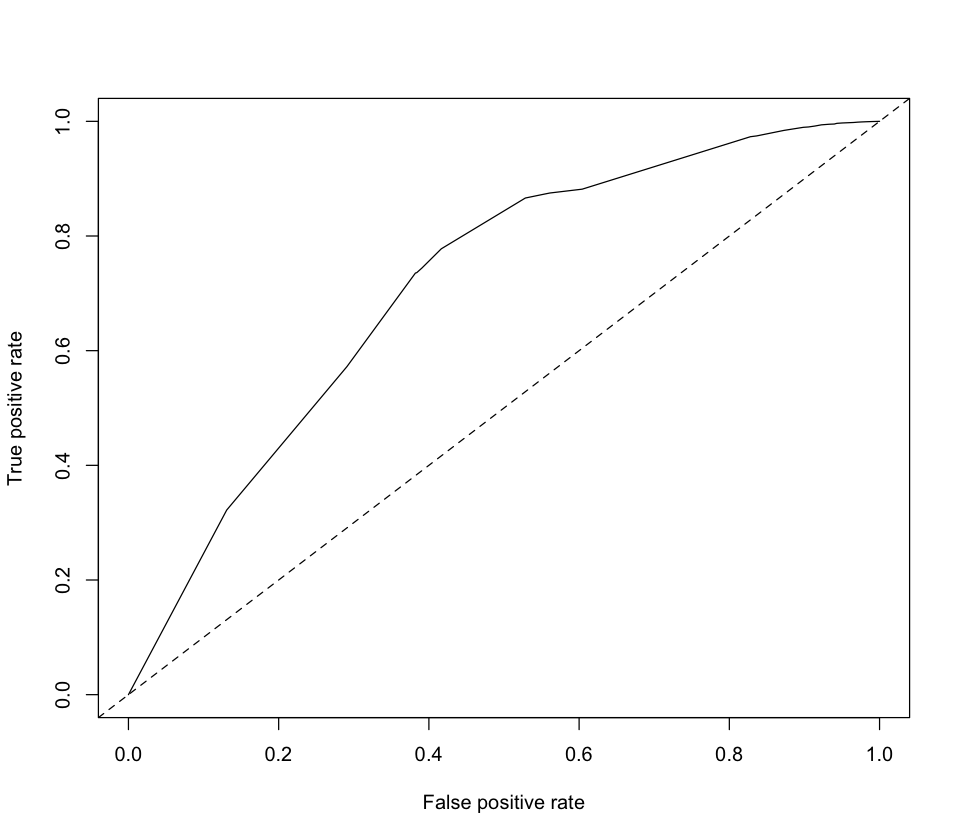

In [1425]:
pred_test <- prediction(predict(modello_smer$model, dt_pred_tree, type="prob")[, 2], dt_pred_tree$target)

auc_ROCR <- performance(pred_test, measure = "auc")
print(auc_ROCR@y.values[[1]])

plot(performance(pred_test, measure = "tpr", x.measure = "fpr"),)
abline(0, 1, lty = 2)
png('plot_sme.jpg')
plot(x = performance(pred_test, measure = "tpr", x.measure = "fpr")@x.values[[1]],y = performance(pred_test, measure = "tpr", x.measure = "fpr")@y.values[[1]],type="l", pch = 16,col = 'forestgreen',ylab = 'True positive rate',xlab = 'False positive rate')
abline(0,1, lty = 2)

[1] "roc"


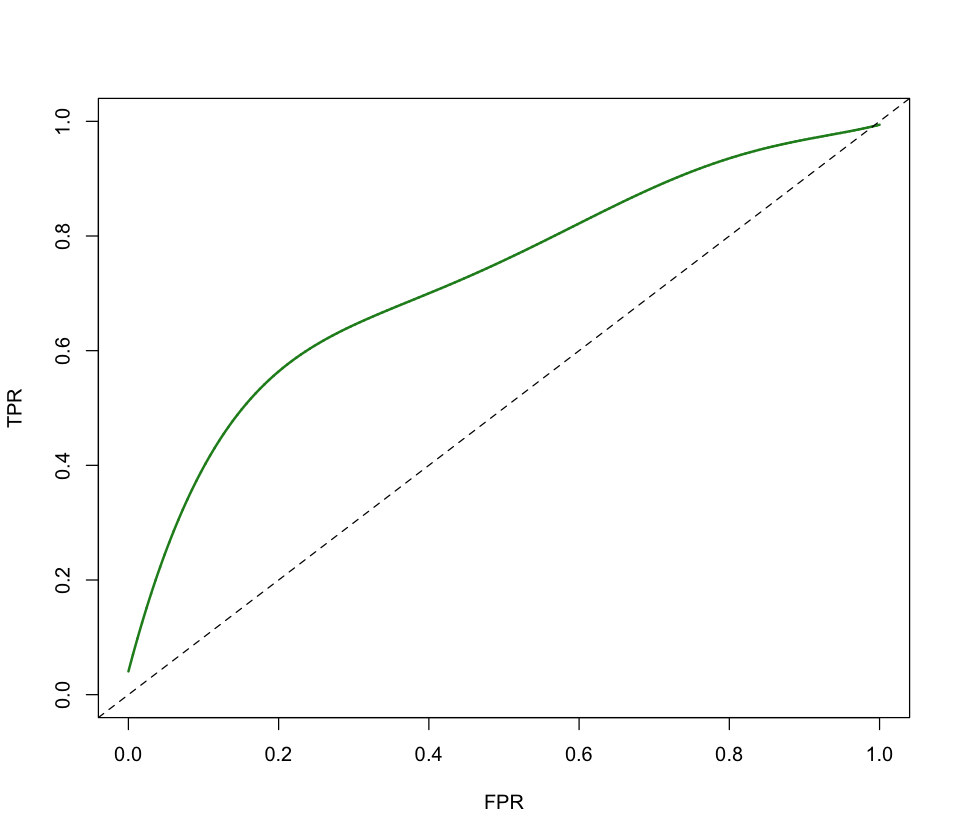

In [1426]:
require(pracma)

rocvalues<-function(predictions, results, type=c("roc","gain")) {
	type<-match.arg(type)
    print(type)
	indici<-order(predictions,decreasing=TRUE)
	vec<-results[indici]
	y<-cumsum(vec)/sum(results) #cumulative positive rate
	if (type=="gain") x<-seq_along(results)/length(results) else x<-cumsum(!vec)/sum(!vec) #percentage of sample
	ritorno<-list(x=x,y=y)
	attr(ritorno,"AUC")<-trapz(x,y)
	ritorno
}

test <- dt_sample
test[,target2:=ifelse(target=="DEFAULT",1,0)]
roc <-rocvalues(test$pred_vpc, test$target2)


rocDT<-data.table(x=roc$x, y=roc$y)
plot(roc$x, roc$y, cex=.1, col='white',pch=15, xlab = 'FPR', ylab = 'TPR')

fit4 <- lm(y~poly(x,4,raw=TRUE), data=rocDT)
fit5 <- lm(y~poly(x,5,raw=TRUE), data=rocDT)
fit6 <- lm(y~poly(x,6,raw=TRUE), data=rocDT)


x_axis <- seq_along(test$target2)/length(test$target2)
#lines(x_axis, predict(fit4, data.frame(x=x_axis)), col='green', lwd=2)
lines(x_axis, predict(fit5, data.frame(x=x_axis)), col='forestgreen', lwd=2)
#lines(x_axis, predict(fit6, data.frame(x=x_axis)), col='blue', lwd=2)
abline(0,1, lty = 2)



### pruning

In [1427]:
# saveRDS(modello_smer,'modello_sme.RDS')

In [1428]:
# modello_smer$model$cptable

In [1429]:
#trimmed.tree <- rpart.plot(modello_smer$model, snip=TRUE))$obj   # manually trim the tree
# trimmed.tree <- rpart.plot(modello$model, snip=TRUE,yesno=1, extra = 105,box.palette="RdGn")$obj
# rpart.plot(trimmed.tree)  

In [1430]:
#model_pruned

# prp(model_pruned,  yesno=1, extra = 105,box.palette="RdGn")

### TEST OVERFITTING

[1] 0.7498303


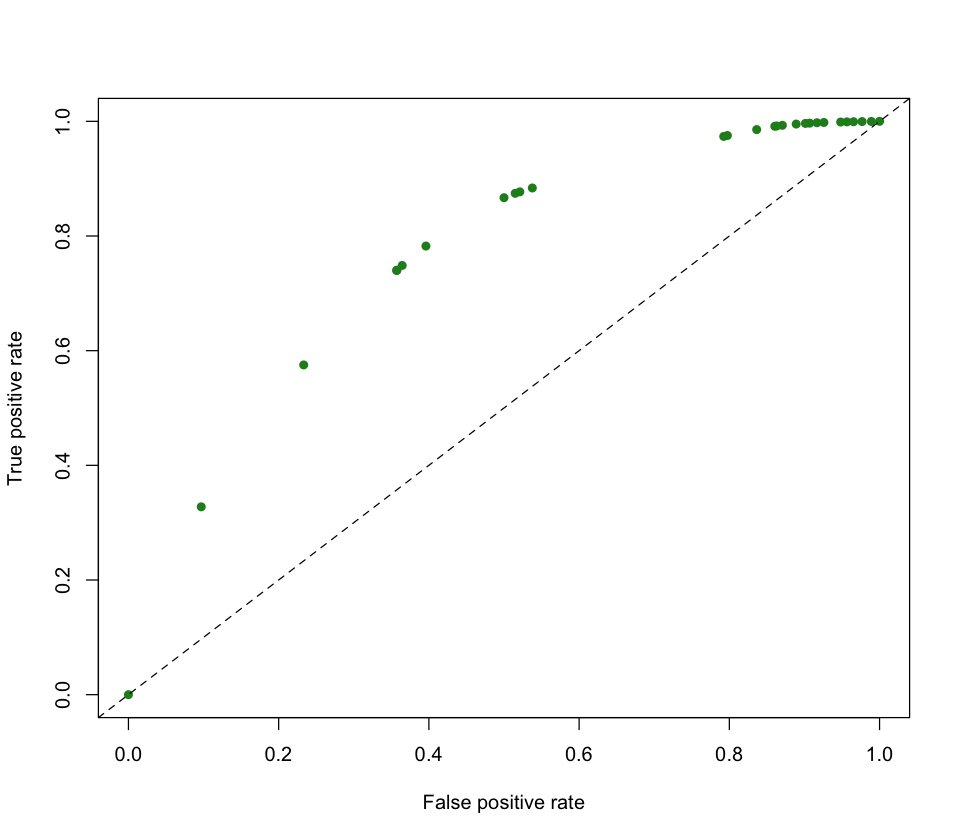

In [1431]:
train <-  master_modello_fill[flag_exante == 'NO',..cols_modello][modello_smer$rows,]

pred_test <- prediction(predict(modello_smer$model, train, type="prob")[, 2], train$target)

auc_ROCR <- performance(pred_test, measure = "auc")
print(auc_ROCR@y.values[[1]])

# plot(performance(pred_test, measure = "tpr", x.measure = "fpr"),)
# abline(0, 1, lty = 2)
#png('plot_sme.jpg')
plot(x = performance(pred_test, measure = "tpr", x.measure = "fpr")@x.values[[1]],y = performance(pred_test, measure = "tpr", x.measure = "fpr")@y.values[[1]],type="p", pch = 16,col = 'forestgreen',ylab = 'True positive rate',xlab = 'False positive rate')
abline(0,1, lty = 2)
#dev.off()

In [1432]:
master_modello_stima <- master_modello_fill[flag_exante == 'NO',][modello_smer$rows,]
master_modello_test <- master_modello_fill[flag_exante == 'NO',][-modello_smer$rows,]

In [ ]:
write.csv(master_modello_stima[, ..cols_modello],'dt_stima_sme_arr.csv', row.names = FALSE)
write.csv(master_modello_stima[, ..cols_modello],'dt_stima_sme_arr.csv', row.names = FALSE)

In [ ]:
dt_tree[type != 'other',]

In [ ]:
soglia_vg <- 0.09
soglia_gr <- 0.1
merge(table_soglie(dt_tree[type != 'other',],soglie = c(soglia_vg,soglia_gr)),
      performance_oldvpc(dt_sample),
      by = 'colore')


In [ ]:
table(dt_sample[pred_vpc <= 0.09  ,CRA_andamento])

In [ ]:
dt_sample_small <- dt_sample[,.(ESITO_FINALE_VPC,pred_vpc,target,NUM_PRATICA, PROGRESS_PRATICA)]
dt_sample_small[, col_new_vpc := "giallo"]
dt_sample_small[pred_vpc <= soglia_vg, col_new_vpc := "verde"]
dt_sample_small[pred_vpc > soglia_gr, col_new_vpc := "rosso"]

In [ ]:
colnames(dt_orig)[grepl('final',colnames(dt_orig))]

In [ ]:
dt_sample_limsoc <- merge(dt_sample_small,
                         dt_orig[,.(NUM_PRATICA, PROGRESS_PRATICA,`Colore - LIMITI SOCIETARI`, `Esito_final_giallo e Monocontrollo_giallo`)],
                         by =c('NUM_PRATICA', 'PROGRESS_PRATICA'),
                         all.x = TRUE)

#table(dt_sample_limsoc[pred_vpc <= 0.1 & `Colore - LIMITI SOCIETARI` == "GIALLO" , ]$pred_vpc, useNA = 'always')

In [ ]:
table(dt_sample_limsoc[ `Colore - LIMITI SOCIETARI` == "ROSSO" & col_new_vpc == 'verde', target ])

In [ ]:
dt_sam_appo <- dt_sample_small[target == "DEFAULT",.(N= .N ), by = c('ESITO_FINALE_VPC','col_new_vpc')]

migr_mat_def <- reshape(dt_sam_appo, idvar = "ESITO_FINALE_VPC", timevar = "col_new_vpc", direction = "wide")

colnames(migr_mat_def) <- gsub("N\\.","New_",colnames(migr_mat_def))
migr_mat_def <- migr_mat_def[,sort(colnames(migr_mat_def)), with = FALSE][order(ESITO_FINALE_VPC)]

dt_sam_appo <- dt_sample_small[target != "DEFAULT",.(N= .N ), by = c('ESITO_FINALE_VPC','col_new_vpc')]

migr_mat_bon <- reshape(dt_sam_appo, idvar = "ESITO_FINALE_VPC", timevar = "col_new_vpc", direction = "wide")

colnames(migr_mat_bon) <- gsub("N\\.","New_",colnames(migr_mat_bon))
migr_mat_bon <- migr_mat_bon[,sort(colnames(migr_mat_bon)), with = FALSE][order(ESITO_FINALE_VPC)]



migr_mat_def <- data.frame(migr_mat_def)
rownames(migr_mat_def) <- migr_mat_def$ESITO_FINALE_VPC
migr_mat_def$ESITO_FINALE_VPC <- NULL
migr_mat_def<- cbind(migr_mat_def, total = rowSums(migr_mat_def))
migr_mat_def<- rbind(migr_mat_def, total = colSums(migr_mat_def))
#rownames(migr_mat_def) <- c(migr_mat_def$ESITO_FINALE_VPC,"total")
migr_mat_def



migr_mat_bon <- data.frame(migr_mat_bon)
rownames(migr_mat_bon) <- migr_mat_bon$ESITO_FINALE_VPC
migr_mat_bon$ESITO_FINALE_VPC <- NULL
migr_mat_bon<- cbind(migr_mat_bon, total = rowSums(migr_mat_bon))
migr_mat_bon<- rbind(migr_mat_bon, total = colSums(migr_mat_bon))

migr_mat_bon

In [ ]:
dt_sample_rossiverdi <- merge(dt_sample_small[col_new_vpc == "verde" & ESITO_FINALE_VPC == "ROSSO",.(pred_vpc,NUM_PRATICA, PROGRESS_PRATICA) ],
                             dt_orig,
                             by = c('NUM_PRATICA',"PROGRESS_PRATICA"),
                             all.x = TRUE)

In [ ]:
dt_sample_rossi_def <- dt_sample_rossiverdi[target == "DEFAULT",]
dt_sample_rossiverdi[target == "DEFAULT" & `Colore - LIMITI SOCIETARI`!= "ROSSO",colnames(dt_sample_rossiverdi)[grepl('ROSSO',dt_sample_rossiverdi)], with = FALSE ]
#colnames(dt_sample_rossiverdi)[grepl('ROSSO',dt_sample_rossiverdi)], with = FALSE 

In [ ]:
dt_sample_rossi_def[`Colore - LIMITI SOCIETARI`!= "ROSSO",colnames(dt_sample_rossi_def)[grepl('Colore -',colnames(dt_sample_rossi_def))], with = FALSE]

In [ ]:
dt_appo <-dt_sample_rossi_def[`Colore - LIMITI SOCIETARI`!= "ROSSO",colnames(dt_sample_rossi_def)[grepl('Colore -',colnames(dt_sample_rossi_def))], with = FALSE]
unlist(lapply(colnames(dt_appo), function(x){
   # if(nrow(dt_appo[get(x) == "ROSSO",]) >1){
         print(x)
    print(nrow(dt_appo[get(x) == "ROSSO",]))
   # }
  
}))


In [ ]:
dt_sample_check <- merge(dt_sample_small[,.(col_new_vpc,pred_vpc,NUM_PRATICA, PROGRESS_PRATICA) ],
                             dt_orig,
                             by = c('NUM_PRATICA',"PROGRESS_PRATICA"),
                             all.x = TRUE)

In [ ]:
table(dt_sample_check$`Colore - BILANCI :PATRIMONIO NET`,useNA = 'always')

In [ ]:
table(dt_sample_check[`Colore - BILANCI :PATRIMONIO NET` == 'ROSSO', .(col_new_vpc,pred_vpc, ESITO_FINALE_VPC,target)]$col_new_vpc)

In [ ]:
dt_sample_check[col_new_vpc == 'giallo' & `Colore - LIMITI SOCIETARI`== "ROSSO",]

In [ ]:
dt_sample_gialliverdi <- merge(dt_sample_small[col_new_vpc == "verde" & ESITO_FINALE_VPC == "GIALLO",.(pred_vpc,NUM_PRATICA, PROGRESS_PRATICA) ],
                             dt_orig,
                             by = c('NUM_PRATICA',"PROGRESS_PRATICA"),
                             all.x = TRUE)

In [ ]:
#dt_sample_gialliverdi[target == "DEFAULT",]

dt_sample_gialli_def <- dt_sample_gialliverdi[target == "DEFAULT",]
dt_sample_gialli_def[ `Colore - LIMITI SOCIETARI`!= "GIALLO" ,colnames(dt_sample_gialli_def)[grepl('GIALLO',dt_sample_gialli_def)], with = FALSE ]

In [ ]:
dt_appo <-dt_sample_gialli_def[ `Colore - LIMITI SOCIETARI`!= "GIALLO" ,colnames(dt_sample_gialli_def)[grepl('GIALLO',dt_sample_gialli_def)], with = FALSE ]
unlist(lapply(colnames(dt_appo), function(x){
    if(nrow(dt_appo[get(x) == "GIALLO",]) >1){
         print(x)
    print(nrow(dt_appo[get(x) == "GIALLO",]))
    }
  
}))


## PERFORMANCE E LIMITI SOCIETARI

In [60]:
soglia_vg <- 0.09
soglia_gr <- 0.1

dt_sample_small <- merge(dt_sample[,.(ESITO_FINALE_VPC,pred_vpc,target,NUM_PRATICA, PROGRESS_PRATICA)],
                         master_modello[,.(NUM_PRATICA,PROGRESS_PRATICA,DSI_importo_fido_richiesto, DSI_sab,RAT_classe_rating_filt)],
                         by = c('NUM_PRATICA','PROGRESS_PRATICA'),
                         all.x = TRUE)

dt_sample_small[, col_new_vpc := "giallo"]
dt_sample_small[pred_vpc <= soglia_vg, col_new_vpc := "verde"]
dt_sample_small[pred_vpc > soglia_gr, col_new_vpc := "rosso"]

tab_perf <- table_soglie(dt_tree[type != 'other',],soglie = c(soglia_vg,soglia_gr))
setnames(tab_perf, c('DEFAULT',"OK","tot","perc"),paste0("new_", c('default',"ok","tot","perc"))) 

old_perf <-  performance_oldvpc(dt_sample)
setnames(old_perf, c('DEFAULT',"OK"),paste0("old_", c('default',"ok"))) 
old_perf

nrow(dt_sample_small[col_new_vpc == 'verde',])

perf_raw <- merge(tab_perf,
      old_perf,
      by = 'colore')
perf_raw

dt_sample_limsoc <- merge(dt_sample_small,
                         dt_orig[,.(NUM_PRATICA, PROGRESS_PRATICA,LIMITE_MAX,`Esito - LIMITI SOCIETARI`,`Colore - LIMITI SOCIETARI`, `Esito_final_giallo e Monocontrollo_giallo`)],
                         by =c('NUM_PRATICA', 'PROGRESS_PRATICA'),
                         all.x = TRUE)

dt_sample_limsoc[,new_limiti := LIMITE_MAX]
dt_sample_limsoc[grepl("I",RAT_classe_rating_filt),new_limiti := 500000]

dt_sample_limsoc[DSI_importo_fido_richiesto >new_limiti ,new_col_limiti := "GIALLO"]
dt_sample_limsoc[DSI_importo_fido_richiesto <= new_limiti ,new_col_limiti := "VERDE"]
dt_sample_limsoc[LIMITE_MAX == 0 ,new_col_limiti := "ROSSO"]
dt_sample_limsoc[DSI_importo_fido_richiesto == 0 ,new_col_limiti := "VERDE"]
dt_sample_limsoc[grepl("R",RAT_classe_rating_filt) & RAT_classe_rating_filt!= 'UR',new_col_limiti := "ROSSO"]

# table(dt_sample_limsoc[grepl('LIMITI',`Esito_final_giallo e Monocontrollo_giallo`), target])

# (nrow(dt_sample_limsoc[grepl('LIMITI',`Esito_final_giallo e Monocontrollo_giallo`) & target == "DEFAULT",]))
# (nrow(dt_sample_limsoc[grepl('LIMITI',`Esito_final_giallo e Monocontrollo_giallo`) & target == "OK",]))

perf_ls <- copy(perf_raw)

perf_ls[colore == "GIALLO", 
        old_default := old_default - (nrow(dt_sample_limsoc[grepl('LIMITI',`Esito_final_giallo e Monocontrollo_giallo`) & target == "DEFAULT",]))]

perf_ls[colore == "GIALLO", old_ok := old_ok - (nrow(dt_sample_limsoc[grepl('LIMITI',`Esito_final_giallo e Monocontrollo_giallo`) & target == "OK",]))]

perf_ls[,old_tot := old_default+old_ok]

perf_ls[,old_perc := round(100*old_default/old_tot,2)]

new_g_da_v_ok <- nrow(dt_sample_limsoc[col_new_vpc == 'verde' &`Colore - LIMITI SOCIETARI` == "GIALLO" & target == "OK",])

new_g_da_v_default<- nrow(dt_sample_limsoc[col_new_vpc == 'verde' &`Colore - LIMITI SOCIETARI` == "GIALLO" & target == "DEFAULT",])

new_r_da_v_ok<- nrow(dt_sample_limsoc[col_new_vpc == 'verde' &`Colore - LIMITI SOCIETARI` == "ROSSO" & target == "OK",])

new_r_da_v_default<- nrow(dt_sample_limsoc[col_new_vpc == 'verde' &`Colore - LIMITI SOCIETARI` == "ROSSO" & target == "DEFAULT",])

new_r_da_g_ok<- nrow(dt_sample_limsoc[col_new_vpc == 'giallo' &`Colore - LIMITI SOCIETARI` == "ROSSO" & target == "OK",])

new_r_da_g_default<- nrow(dt_sample_limsoc[col_new_vpc == 'giallo' &`Colore - LIMITI SOCIETARI` == "ROSSO" & target == "DEFAULT",])

perf_ls[colore == "GIALLO", new_default := new_default -new_r_da_g_default + new_g_da_v_default]
perf_ls[colore == "GIALLO", new_ok := new_ok - new_r_da_g_ok + new_g_da_v_ok]

perf_ls[colore == "VERDE", new_default := new_default - new_r_da_v_default - new_g_da_v_default]
perf_ls[colore == "VERDE", new_ok := new_ok  - new_r_da_v_ok - new_g_da_v_ok ]

perf_ls[colore == "ROSSO", new_default := new_default  + new_r_da_g_default + new_r_da_v_default]
perf_ls[colore == "ROSSO", new_ok := new_ok + new_r_da_g_ok + new_r_da_v_ok ]

perf_ls[,new_tot := new_default+new_ok]
perf_ls[,new_perc := round(100*new_default/new_tot,2)]

perf_ls

perf_new_ls <- copy(perf_raw)

perf_new_ls[colore == "GIALLO", 
        old_default := old_default - (nrow(dt_sample_limsoc[grepl('LIMITI',`Esito_final_giallo e Monocontrollo_giallo`) & target == "DEFAULT" & new_col_limiti == "GIALLO",]))]

perf_new_ls[colore == "GIALLO", old_ok := old_ok - (nrow(dt_sample_limsoc[grepl('LIMITI',`Esito_final_giallo e Monocontrollo_giallo`) & new_col_limiti == "GIALLO" & target == "OK",]))]


perf_new_ls[colore == "VERDE", 
        old_default := old_default - (nrow(dt_sample_limsoc[grepl('LIMITI',`Esito_final_giallo e Monocontrollo_giallo`) & target == "DEFAULT" & new_col_limiti == "VERDE",]))]

perf_new_ls[colore == "VERDE", old_ok := old_ok - (nrow(dt_sample_limsoc[grepl('LIMITI',`Esito_final_giallo e Monocontrollo_giallo`) & new_col_limiti == "VERDE" & target == "OK",]))]


perf_new_ls[colore == "ROSSO", 
        old_default := old_default - (nrow(dt_sample_limsoc[grepl('LIMITI',`Esito_final_giallo e Monocontrollo_giallo`) & target == "DEFAULT" & new_col_limiti == "ROSSO",]))]

perf_new_ls[colore == "ROSSO", old_ok := old_ok - (nrow(dt_sample_limsoc[grepl('LIMITI',`Esito_final_giallo e Monocontrollo_giallo`) & new_col_limiti == "ROSSO" & target == "OK",]))]



perf_new_ls[,old_tot := old_default+old_ok]

perf_new_ls[,old_perc := round(100*old_default/old_tot,2)]

new_g_da_v_ok <- nrow(dt_sample_limsoc[col_new_vpc == 'verde' & new_col_limiti == "GIALLO" & target == "OK",])

new_g_da_v_default<- nrow(dt_sample_limsoc[col_new_vpc == 'verde' & new_col_limiti == "GIALLO" & target == "DEFAULT",])

new_r_da_v_ok<- nrow(dt_sample_limsoc[col_new_vpc == 'verde' & new_col_limiti == "ROSSO" & target == "OK",])

new_r_da_v_default<- nrow(dt_sample_limsoc[col_new_vpc == 'verde' & new_col_limiti == "ROSSO" & target == "DEFAULT",])

new_r_da_g_ok<- nrow(dt_sample_limsoc[col_new_vpc == 'giallo' & new_col_limiti == "ROSSO" & target == "OK",])

new_r_da_g_default<- nrow(dt_sample_limsoc[col_new_vpc == 'giallo' & new_col_limiti == "ROSSO" & target == "DEFAULT",])

perf_new_ls[colore == "GIALLO", new_default := new_default -new_r_da_g_default + new_g_da_v_default]
perf_new_ls[colore == "GIALLO", new_ok := new_ok - new_r_da_g_ok + new_g_da_v_ok]

perf_new_ls[colore == "VERDE", new_default := new_default - new_r_da_v_default - new_g_da_v_default]
perf_new_ls[colore == "VERDE", new_ok := new_ok  - new_r_da_v_ok - new_g_da_v_ok ]

perf_new_ls[colore == "ROSSO", new_default := new_default  + new_r_da_g_default + new_r_da_v_default]
perf_new_ls[colore == "ROSSO", new_ok := new_ok + new_r_da_g_ok + new_r_da_v_ok ]

perf_new_ls[,new_tot := new_default+new_ok]
perf_new_ls[,new_perc := round(100*new_default/new_tot,2)]

perf_new_ls

                              soglia DEFAULT    OK   tot   perc colore
1:                  pred_vpc <= 0.09     351 14086 14437  2.431  VERDE
2: pred_vpc <= 0.1 & pred_vpc > 0.09     135  1484  1619  8.338 GIALLO
3:                    pred_vpc > 0.1      95   406   501 18.962  ROSSO


colore,old_default,old_ok,old_tot,old_perc
<chr>,<int>,<int>,<int>,<dbl>
VERDE,416,12634,13050,3.188
GIALLO,75,1952,2027,3.700
ROSSO,90,1390,1480,6.081


[1] 14437

colore,soglia,new_default,new_ok,new_tot,new_perc,old_default,old_ok,old_tot,old_perc
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
GIALLO,pred_vpc <= 0.1 & pred_vpc > 0.09,135,1484,1619,8.338,75,1952,2027,3.700
ROSSO,pred_vpc > 0.1,95,406,501,18.962,90,1390,1480,6.081
VERDE,pred_vpc <= 0.09,351,14086,14437,2.431,416,12634,13050,3.188


colore,soglia,new_default,new_ok,new_tot,new_perc,old_default,old_ok,old_tot,old_perc
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
GIALLO,pred_vpc <= 0.1 & pred_vpc > 0.09,145,2339,2484,5.84,52,1502,1554,3.35
ROSSO,pred_vpc > 0.1,148,1114,1262,11.73,90,1390,1480,6.08
VERDE,pred_vpc <= 0.09,288,12523,12811,2.25,416,12634,13050,3.19


colore,soglia,new_default,new_ok,new_tot,new_perc,old_default,old_ok,old_tot,old_perc
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
GIALLO,pred_vpc <= 0.1 & pred_vpc > 0.09,137,1964,2101,6.52,58,1623,1681,3.45
ROSSO,pred_vpc > 0.1,172,1351,1523,11.29,84,1359,1443,5.82
VERDE,pred_vpc <= 0.09,272,12661,12933,2.10,416,12544,12960,3.21


In [61]:
cols_color <- c(colnames(dt_orig)[grepl("Colore -",colnames(dt_orig)) & !grepl('LIMITI SOCIETARI',colnames(dt_orig))])
#cols_color

dt_color <- dt_orig[,c("NUM_PRATICA","PROGRESS_PRATICA","ESITO_FINALE_VPC",cols_color), with = FALSE]

dt_color[, (cols_color) := lapply(dt_color[,cols_color, with = FALSE], function(col){
        as.numeric(factor(col, levels = c('NERO','GRIGIO','VERDE','GIALLO','ROSSO')))
})]

dt_color[, col_senzalimiti := do.call(pmax, c(.SD, list(na.rm = TRUE))), .SDcols=cols_color]

dt_sample_limsoc <- merge(dt_sample_limsoc,
                         dt_color[, c("NUM_PRATICA","PROGRESS_PRATICA",'col_senzalimiti')],
                         by = c("NUM_PRATICA","PROGRESS_PRATICA"),
                         all.x = TRUE)

In [62]:
sort(cols_color)

[1] "Colore - ABI/CAB/CONTO OBBLIGATO" "Colore - APPLICAZIONE CON CAUSAL"
 [3] "Colore - APPLICAZIONI CON CAUSAL" "Colore - APPROVATO"              
 [5] "Colore - ATECO BKIT OBBLIGATORIO" "Colore - AUTONOMIA FIDO"         
 [7] "Colore - AUTORIZZAZIONE NO CONTR" "Colore - BILANCI :DEBITI BANCARI"
 [9] "Colore - BILANCI :PASSIVO CORREN" "Colore - BILANCI :PATRIMONIO NET"
[11] "Colore - CEDENTE APPARTIENE A GR" "Colore - CEDENTE REVOCATO"       
[13] "Colore - CEDENTE TRAVEL"          "Colore - CODICE CLIENTE GIA' PRE"
[15] "Colore - CODICE CLIENTE GIA_0001" "Colore - CODICE CLIENTE GIA_0002"
[17] "Colore - CODICE FISCALE FORMALME" "Colore - CODICE FISCALE GIA' PRE"
[19] "Colore - CODICE FISCALE GIA_0001" "Colore - CODICE FISCALE/P. IVA N"
[21] "Colore - CONFIRMING - CHAMPION D" "Colore - CONFIRMING - CODICE FIS"
[23] "Colore - CONFIRMING - CODICE FOR" "Colore - CONFIRMING - CODIC_0001"
[25] "Colore - CONFIRMING - P.IVA GIA'" "Colore - CR: PRESENZA SCONFINAME"
[27] "Colore - CR: PRESENZA SOFFERENZE" "Colore - CR: UTILIZZATO > ACCORD"
[29] "Colore - DATA COSTITUZIONE"       "Colore - ERRORE GENERICO, RISOTT"
[31] "Colore - EXPORT FACILE- FISCALE"  "Colore - EXPORT FACILE-SIA CEDEN"
[33] "Colore - FALLIMENTI CERTI"        "Colore - FALLIMENTI DUBBI"       
[35] "Colore - FIDO CON CAUSALE NEGATI" "Colore - FIDO RIDOTTO"           
[37] "Colore - FIDO SCADUTO"            "Colore - FORMA GIURIDICA SENZA C"
[39] "Colore - IMPORTO RICHIESTO <= AD" "Colore - IMPORTO RICHIESTO A ZER"
[41] "Colore - IMPRESE COLLEGATE: PROC" "Colore - INCONGRUENZA TRA LOCALI"
[43] "Colore - INSERIMENTO NON CONSENT" "Colore - NDG SETTORIALE MANCANTE"
[45] "Colore - NESSUNA POSIZIONE INCRO" "Colore - NUMERO INTERROGAZIONI"  
[47] "Colore - P.IVA GIA' PRESENTE NEL" "Colore - PARTE CORRELATA"        
[49] "Colore - PREGIUDIZIEVOLI GRAVI"   "Colore - PRESENZA DI FIDI CEDENT"
[51] "Colore - PRESENZA GARANZIA OPERA" "Colore - PRESENZA PRATICA IN PEF"
[53] "Colore - PRESENZA SOGGETTO IN PI" "Colore - PROCEDURE CONCORSUALI"  
[55] "Colore - PROTESTI CERTI"          "Colore - PROTESTI DUBBI"         
[57] "Colore - RAPPORTI IN OSSERVAZION" "Colore - RATING SCADUTO"         
[59] "Colore - SCADUTO > 20%OUTSTANDIN" "Colore - SOGGETTO CEDENTE"       
[61] "Colore - SOGGETTO CON FORMA GIUR" "Colore - SOGGETTO EEPP"          
[63] "Colore - SOGGETTO ESTERO"         "Colore - STATO SAB"              
[65] "Colore - STATO SOCIETARIO"        "Colore - TIMEOUT SCADUTO1"       
[67] "Colore - TIMEOUT SCADUTO2"        "Colore - TIMEOUT SCADUTO3"       
[69] "Colore - TIPO OPERAZIONE RIDUZIO"

In [63]:
dt_sample_limsoc[col_senzalimiti ==3, colore_senza_limsoc := "VERDE"]
dt_sample_limsoc[col_senzalimiti ==4, colore_senza_limsoc := "GIALLO"]
dt_sample_limsoc[col_senzalimiti ==5, colore_senza_limsoc := "ROSSO"]

colnames(dt_sample_limsoc)

dt_test_lim_soc <- dt_sample_limsoc[,.(NUM_PRATICA,PROGRESS_PRATICA,ESITO_FINALE_VPC,pred_vpc,target,`Colore - LIMITI SOCIETARI`,new_col_limiti,colore_senza_limsoc)]

[1] "NUM_PRATICA"                              
 [2] "PROGRESS_PRATICA"                         
 [3] "ESITO_FINALE_VPC"                         
 [4] "pred_vpc"                                 
 [5] "target"                                   
 [6] "DSI_importo_fido_richiesto"               
 [7] "DSI_sab"                                  
 [8] "RAT_classe_rating_filt"                   
 [9] "col_new_vpc"                              
[10] "LIMITE_MAX"                               
[11] "Esito - LIMITI SOCIETARI"                 
[12] "Colore - LIMITI SOCIETARI"                
[13] "Esito_final_giallo e Monocontrollo_giallo"
[14] "new_limiti"                               
[15] "new_col_limiti"                           
[16] "col_senzalimiti"                          
[17] "colore_senza_limsoc"

In [64]:
dt_sample_limsoc

NUM_PRATICA,PROGRESS_PRATICA,ESITO_FINALE_VPC,pred_vpc,target,DSI_importo_fido_richiesto,DSI_sab,RAT_classe_rating_filt,col_new_vpc,LIMITE_MAX,Esito - LIMITI SOCIETARI,Colore - LIMITI SOCIETARI,Esito_final_giallo e Monocontrollo_giallo,new_limiti,new_col_limiti,col_senzalimiti,colore_senza_limsoc
<dbl>,<int>,<chr>,<dbl>,<fct>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
103230046,1,GIALLO,0.02607731,OK,42000,2,M2,verde,20000,NA,GIALLO,Monocontrollo - LIMITI SOCIETARI,20000,GIALLO,3,VERDE
107230033,1,GIALLO,0.02607731,OK,75600,2,I6,verde,20000,NA,GIALLO,NO,500000,VERDE,4,GIALLO
108230022,1,GIALLO,0.01043930,OK,90000,2,NA,verde,35000,NA,GIALLO,NO,35000,GIALLO,4,GIALLO
108230032,1,VERDE,0.01043930,OK,9000,2,NA,verde,25000,NA,VERDE,NO,25000,VERDE,4,GIALLO
108230033,1,VERDE,0.09649123,OK,3000,2,NA,giallo,25000,NA,VERDE,NO,25000,VERDE,4,GIALLO
109230036,1,VERDE,0.01927248,OK,2000,2,M1,verde,25000,NA,VERDE,NO,25000,VERDE,3,VERDE
109230046,1,ROSSO,0.02607731,OK,3600,2,I3,verde,60000,NA,VERDE,NO,500000,VERDE,5,ROSSO
113230036,4,VERDE,0.01043930,OK,3600,2,M2,verde,25000,NA,VERDE,NO,25000,VERDE,3,VERDE
113230044,1,VERDE,0.09179965,OK,3000,2,M4,giallo,20000,NA,VERDE,NO,20000,VERDE,3,VERDE


In [65]:
table(dt_sample_limsoc$ESITO_FINALE_VPC)
table(dt_sample_limsoc$colore_senza_limsoc)


GIALLO  ROSSO  VERDE 
  2027   1480  13050 


GIALLO  ROSSO  VERDE 
  2231    970  13355 

In [66]:
table(dt_orig$`Colore - STATO SOCIETARIO`)


GIALLO     ND  ROSSO  VERDE 
    21      1    556  96761 

In [67]:
 dt_sample_limsoc <- merge(dt_sample_limsoc,
                          dt_orig[, c("NUM_PRATICA","PROGRESS_PRATICA",cols_color), with = FALSE],
                          by =  c("NUM_PRATICA","PROGRESS_PRATICA"),
                           all.x = TRUE)

In [68]:
write.csv(dt_sample_limsoc,'dt_test_lim_soc_sme.csv',row.names = FALSE)

In [69]:
cols_color <- c(colnames(dt_orig)[grepl("Colore -",colnames(dt_orig)) & !grepl('LIMITI SOCIETARI',colnames(dt_orig))])
#cols_color

dt_color <- dt_orig[,c("NUM_PRATICA","PROGRESS_PRATICA","ESITO_FINALE_VPC","SNDG_CEDUTO",cols_color), with = FALSE]

dt_color[, (cols_color) := lapply(dt_color[,cols_color, with = FALSE], function(col){
        as.numeric(factor(col, levels = c('NERO','GRIGIO','VERDE','GIALLO','ROSSO')))
})]

dt_color[, col_senzalimiti := do.call(pmax, c(.SD, list(na.rm = TRUE))), .SDcols=cols_color]

# dt_sample_limsoc <- merge(dt_sample_limsoc,
#                          dt_color[, c("NUM_PRATICA","PROGRESS_PRATICA",'col_senzalimiti')],
#                          by = c("NUM_PRATICA","PROGRESS_PRATICA"),
#                          all.x = TRUE)
dt_color[col_senzalimiti ==3, colore_senza_limsoc := "VERDE"]
dt_color[col_senzalimiti ==4, colore_senza_limsoc := "GIALLO"]
dt_color[col_senzalimiti ==5, colore_senza_limsoc := "ROSSO"]

In [70]:
table(dt_color$colore_senza_limsoc)
table(dt_color$ESITO_FINALE_VPC)


GIALLO  ROSSO  VERDE 
 26925  16137  97019 


GIALLO  ROSSO  VERDE 
 29380  18793  91935 

In [71]:
which(unlist(dt_sample_limsoc[ESITO_FINALE_VPC == "VERDE" & colore_senza_limsoc == "GIALLO",][1,]) == "GIALLO")

colore_senza_limsoc Colore - FIDO SCADUTO 
                   17                    55

In [477]:
colnames(dt_orig)[!grepl("-",colnames(dt_orig))]

[1] "NUM_PRATICA"                               
  [2] "PROGRESS_PRATICA"                          
  [3] "STATO_PRATICA"                             
  [4] "CHIAVE_DB"                                 
  [5] "ABI"                                       
  [6] "ABI_PEF5"                                  
  [7] "FILIALE_PEF5"                              
  [8] "ANNO_PEF5"                                 
  [9] "PROGRESSIVO_PEF5"                          
 [10] "TIPO_PRATICA"                              
 [11] "PROVENIENZA_PRATICA"                       
 [12] "DESCRIZIONE_PROVENIENZA"                   
 [13] "DATA_DELIBERA_O_ANNULL_FIDO"               
 [14] "ANNOMESE_DELIBERA_O_ANNULL_FIDO"           
 [15] "CONDICE_CONSOCIATA"                        
 [16] "USER_ISTRUTTORIA"                          
 [17] "DATA_ISTRUTTORIA"                          
 [18] "USER_DELIBERA"                             
 [19] "SNDG_CEDUTO_old"                           
 [20] "CODICE_FISCALE_CEDUTO"                     
 [21] "NDG_CEDUTO"                                
 [22] "ANDI_NDG_SUPER"                            
 [23] "FILIALE_FACTORING_CEDUTO"                  
 [24] "SETTORE_CEDUTO"                            
 [25] "NDG_CEDENTE"                               
 [26] "DIVISIONE_CEDUTO"                          
 [27] "TIPO APPLICAZIONE"                         
 [28] "IMPORTO RICHIESTO APPLICAZIONE"            
 [29] "DIVISA RICHIESTA APPLICAZIONE"             
 [30] "TIPO OPERAZIONE RICHIESTA APPLIC"          
 [31] "IMPORTO CONCESSO APPLICAZIONE"             
 [32] "DIVISA CONCESSA APPLICAZIONE"              
 [33] "TIPO OPERAZIONE CONCESSA APPLICA"          
 [34] "FT FACTORING"                              
 [35] "TIPOLOGIA FT FACTORING (CONTINUA"          
 [36] "INDICATORE SE FIDO CAPOFILA O PR"          
 [37] "TIPO OPERAZIONE FIDO"                      
 [38] "IMPORTO FIDO"                              
 [39] "DIVISA FIDO"                               
 [40] "SNDG_CEDENTE"                              
 [41] "CODICE_FISCALE_CEDENTE"                    
 [42] "ID_CEDENTE"                                
 [43] "STATO_CEDENTE"                             
 [44] "CEDENTE_SI/NO"                             
 [45] "DEBITORE_SI/NO"                            
 [46] "DESCR_STATO_CEDENTE"                       
 [47] "FILIALE_CEDENTE"                           
 [48] "SETTORE_CEDENTE"                           
 [49] "DESCRIZIONE_SETTORE"                       
 [50] "PRESENZA_POLIZZA_SI_NO"                    
 [51] "ESITO_FINALE_VPC"                          
 [52] "TIPO_PRODOTTO"                             
 [53] "IMPORTO_RICHIESTO"                         
 [54] "Right_NUM_PRATICA"                         
 [55] "Right_PROGRESS_PRATICA"                    
 [56] "Right_STATO_PRATICA"                       
 [57] "RAE_CEDUTO"                                
 [58] "RAE_DESCR_CEDUTO"                          
 [59] "SAE_CEDUTO"                                
 [60] "SAE_DESCR_CEDUTO"                          
 [61] "RAE_CEDENTE"                               
 [62] "RAE_DESCR_CEDENTE"                         
 [63] "SAE_CEDENTE"                               
 [64] "SAE_DESCR_CEDENTE"                         
 [65] "NUMERO_TOT_FIDI"                           
 [66] "COUNT_FIDI_IN_CONFERMA"                    
 [67] "SUM_IMPORT_FIDI_CONCESSIONE"               
 [68] "SUM_IMPORT_FIDI_AUMENTO"                   
 [69] "DATA_RICHIESTA_FIDO"                       
 [70] "ISR_DATA"                                  
 [71] "ISR_CODICE"                                
 [72] "ISR_DESCRIZIONE"                           
 [73] "DATA_PERFEZ_CONTRATTO"                     
 [74] "IMPORTO_ORIGINALE"                         
 [75] "SEMAFORO_PRIMO_LIVELLO"                    
 [76] "POLIZZA_DIRETTA_(39)"                      
 [77] "POLIZZA_INDIRETTA_(41)"                    
 [78] "PREFISSO_MOD_RATING_CEDUTO"                
 [79] "MODELLO_RATING_CE

### SOGLIE

In [ ]:
dt_tree

In [ ]:
td_campione <- sum(dt_sample$target == 'DEFAULT')/nrow(dt_sample)

td_verde <- seq(0.5*td_campione, 0.8*td_campione, length.out = 6)

num_gialli <- seq(0.01*nrow(dt_sample), 0.04*nrow(dt_sample), length.out = 6)



In [ ]:
td_campione
td_verde
num_gialli

In [ ]:
dt_tree

In [ ]:
i = 4
s_vg <- tail(dt_tree[td_cumulato <=td_verde[i] ,]$pred_vpc,1)

dt_foglie_g_r <- dt_tree[td_cumulato > td_verde[i] ,]
dt_foglie_g_r[, cum_n := cumsum(tot)]
dt_foglie_g_r

In [ ]:
j <- 3
dt_foglie_g_r[cum_n <= num_gialli[j] ,]

s_g_r <- tail(dt_foglie_g_r[cum_n <= num_gialli[j] ,]$pred_vpc,1)

table_soglie(modello_smer$tree_table,soglie = c(s_vg,s_g_r),)

## spiegazione business 

In [ ]:
dt_noncensiti <- merge(pratiche_noncens,
                      master_modello,
                      by =  c('NUM_PRATICA','PROGRESS_PRATICA'),
                      all.x = TRUE)

In [ ]:
dt_noncensiti

In [ ]:
dt_rules <- setDT(unique(rpart.predict(modello_smer$model,newdata= dt_noncensiti, rules = TRUE)))
colnames(dt_rules) <- c('DEFAULT',"OK","ramo")
dt_rules <- dt_rules[,.(DEFAULT,ramo)]

In [ ]:
dt_rules[, nodi := str_count(ramo, "&")+1]
dt_rules[,ramo := gsub("\\s+"," ",ramo)]

In [ ]:
dt_rules[,ramo := gsub("&","& ____",ramo)]
dt_rules[,ramo := gsub("____","\n",ramo)]
dt_rules[order(DEFAULT)]

In [ ]:
colnames(dt_noncensiti)


In [ ]:
table(dt_noncensiti$CR_utilizzato)

In [ ]:
table(master_modello_fill$DSI_flag_fidi_scaduti)/nrow(master_modello_fill)

In [ ]:
table(dt_noncensiti$DSI_flag_fidi_scaduti)

## CROSS VALIDATION

[1] 66224
[1] 16557
[1] 5


Using 'N' as value column. Use 'value.var' to override



[1] 0.7170333


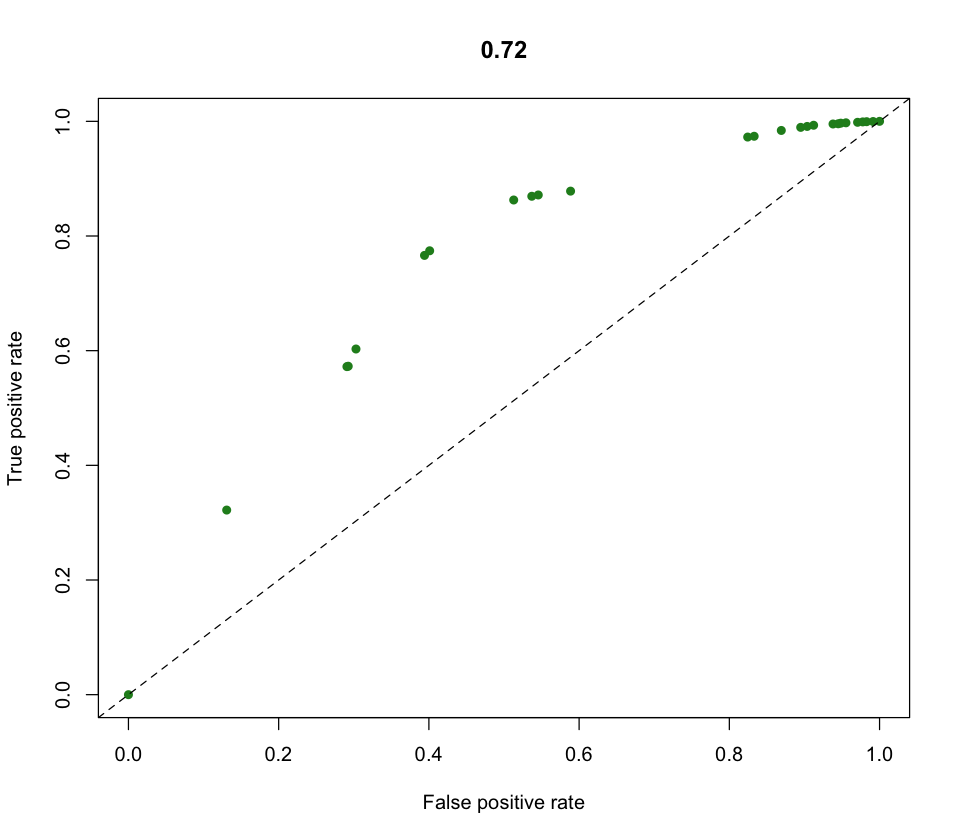

In [924]:
lista_auc2 <- lapply(c(1111), function(seed){
    
    modello_smer <- compute_model(
    master_modello_fill[flag_exante == 'NO',..cols_modello],
    suffix="sme_V4",cp = 0.0001,seed = seed,minbuck= 0.0005, 
    use_surr = 1, perc_split = 0.80,desc = 'sme')
    
  
    dt_pred_tree <- merge(modello_smer$pred,unique(model_frame[type =='leaf',.(yval2.V4,type)]),by.x ='pred_vpc', by.y = 'yval2.V4', all.x = TRUE )

pred_test <- prediction(predict(modello_smer$model, dt_pred_tree, type="prob")[, 2], dt_pred_tree$target)

auc_ROCR <- performance(pred_test, measure = "auc")
print(auc_ROCR@y.values[[1]])

#png(paste0('cross_val/plot_smev4', seed,'.jpg'))
plot( x = performance(pred_test, measure = "tpr", x.measure = "fpr")@x.values[[1]],y = performance(pred_test, measure = "tpr", x.measure = "fpr")@y.values[[1]],type="p", pch = 16,col = 'forestgreen',ylab = 'True positive rate', main =round(auc_ROCR@y.values[[1]],2), xlab = 'False positive rate',)
abline(0,1, lty = 2)
#dev.off()
    return(auc_ROCR@y.values[[1]])
})

#names(lista_auc2)<- c(1111,10311,33433,45343,651194,12323,4343,532)

In [200]:
(sum(unlist(lista_auc2))-0.518970910228339)/(length(lista_auc2)-1)
lista_auc2

[1] 0.7042319

$`1111`
[1] 0.7144105

$`10311`
[1] 0.5968965

$`33433`
[1] 0.7317667

$`45343`
[1] 0.5861739

$`651194`
[1] 0.6446906

$`12323`
[1] 0.7510631

$`4343`
[1] 0.6958681

$`532`
[1] 0.7277252

## PERFORMANCE SLIDE

In [1433]:
solo_censiti <- FALSE

In [1434]:
dt_sample_all <- merge(modello_smer$pred,dt_orig[,c('NUM_PRATICA',"PROGRESS_PRATICA",'ESITO_FINALE_VPC')],by.x = c('NUM_PRATICA',"PROGRESS_PRATICA"), by.y = c('NUM_PRATICA',"PROGRESS_PRATICA"),all.x = TRUE,
                suffixes = c("","_y"))

In [1435]:
model_frame <- as.data.table(modello_smer$model$frame)
model_frame[,type := 'leaf']
model_frame[var != '<leaf>',type := 'other']

modello_smer$tree_table[,round_pred := round(as.numeric(pred_vpc),7) ]
model_frame[,round_pred := round(yval2.V4,7) ]

dt_tree <-unique(merge(modello_smer$tree_table,
                       model_frame[,c('var','type','round_pred')], 
                       by = 'round_pred',
                       all.x = TRUE))


In [1436]:
dt_sample <-merge(dt_sample_all,
                 master_modello[,.(NUM_PRATICA, PROGRESS_PRATICA,Classificazione_Cliente)],
                 by = c('NUM_PRATICA', 'PROGRESS_PRATICA'),
                 all.x = TRUE)

In [1437]:
if(solo_censiti){
    dt_sample <- dt_sample[Classificazione_Cliente =='CLIENTE', ]
dt_tree <- dt_sample_censiti[,.(DEFAULT = sum(target == "DEFAULT"), OK = sum(target == "OK"),tot = .N), by = 'pred_vpc'][order(pred_vpc)]
}


## ANALISI PERFORMANCE 

In [1438]:
table_performance <- dt_tree[,.(pred_vpc,DEFAULT,OK,tot)]
table_performance[, tot_verdi := round(100*cumsum(tot)/sum(tot),2)]
table_performance[, lift_verde := round((cumsum(DEFAULT)/cumsum(tot))/(sum(DEFAULT)/sum(tot)),2)]
table_performance <- table_performance[order(-pred_vpc)]

table_performance[,td_foglia := round(100*DEFAULT/tot,2)]
table_performance[,def_cum := cumsum(DEFAULT)]
table_performance[,ok_cum := cumsum(OK)]
table_performance[,tot_cum := cumsum(tot)]


table_performance[,recall := round(100*(def_cum-DEFAULT)/sum(DEFAULT),2)]
table_performance[,precision :=  round(100*def_cum/tot_cum,2)]
table_performance[,accuracy :=  round(100*(def_cum+sum(OK) - ok_cum)/sum(tot),2)]
table_performance[,lift := round((def_cum/tot_cum)/(sum(DEFAULT)/sum(tot)),2)]

cat('tot default',sum(table_performance$DEFAULT))
cat('\ntot ok',sum(table_performance$OK))
cat('\ntot ',sum(table_performance$tot))
cat('\ntd ',round(100*sum(table_performance$DEFAULT)/sum(table_performance$tot),2))
table_performance[,pred_vpc := as.numeric(pred_vpc)]
table_performance

tot default 581
tot ok 15976
tot  16557
td  3.51

pred_vpc,DEFAULT,OK,tot,tot_verdi,lift_verde,td_foglia,def_cum,ok_cum,tot_cum,recall,precision,accuracy,lift
<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0.67567568,5,5,10,100.00,1.00,50.00,5,5,10,0.00,50.00,96.49,14.25
0.66666667,5,6,11,99.94,0.99,45.45,10,11,21,0.86,47.62,96.48,13.57
0.57777778,4,6,10,99.87,0.98,40.00,14,17,31,1.72,45.16,96.47,12.87
0.55555556,3,6,9,99.81,0.98,33.33,17,23,40,2.41,42.50,96.45,12.11
0.52777778,3,9,12,99.76,0.97,25.00,20,32,52,2.93,38.46,96.42,10.96
0.51515152,9,14,23,99.69,0.97,39.13,29,46,75,3.44,38.67,96.39,11.02
0.41176471,4,10,14,99.55,0.95,28.57,33,56,89,4.99,37.08,96.35,10.57
0.32352941,2,19,21,99.46,0.95,9.52,35,75,110,5.68,31.82,96.25,9.07
0.30952381,4,6,10,99.34,0.95,40.00,39,81,120,6.02,32.50,96.24,9.26


In [1439]:
if(solo_censiti){
    write.xlsx(table_performance, 'table_performance_v4_clienti.xlsx', row.names= FALSE)
}else{
    write.xlsx(table_performance, 'table_performance_v4.xlsx', row.names= FALSE)
}

In [1440]:
cat('tot default',sum(table_performance$DEFAULT))
cat('\ntot ok',sum(table_performance$OK))
cat('\ntot ',sum(table_performance$tot))
cat('\ntd ',round(100*sum(table_performance$DEFAULT)/sum(table_performance$tot),2))
table_performance[,pred_vpc := as.numeric(pred_vpc)]
table_performance

tot default 581
tot ok 15976
tot  16557
td  3.51

pred_vpc,DEFAULT,OK,tot,tot_verdi,lift_verde,td_foglia,def_cum,ok_cum,tot_cum,recall,precision,accuracy,lift
<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0.67567568,5,5,10,100.00,1.00,50.00,5,5,10,0.00,50.00,96.49,14.25
0.66666667,5,6,11,99.94,0.99,45.45,10,11,21,0.86,47.62,96.48,13.57
0.57777778,4,6,10,99.87,0.98,40.00,14,17,31,1.72,45.16,96.47,12.87
0.55555556,3,6,9,99.81,0.98,33.33,17,23,40,2.41,42.50,96.45,12.11
0.52777778,3,9,12,99.76,0.97,25.00,20,32,52,2.93,38.46,96.42,10.96
0.51515152,9,14,23,99.69,0.97,39.13,29,46,75,3.44,38.67,96.39,11.02
0.41176471,4,10,14,99.55,0.95,28.57,33,56,89,4.99,37.08,96.35,10.57
0.32352941,2,19,21,99.46,0.95,9.52,35,75,110,5.68,31.82,96.25,9.07
0.30952381,4,6,10,99.34,0.95,40.00,39,81,120,6.02,32.50,96.24,9.26


In [1528]:
performance_prelim <- function(dt){
    rbindlist(lapply(c("VERDE","GIALLO","ROSSO"),function(x){
       dt_appo <- dt[colore_senza_limsoc == x,
                 list(colore = x,
                      DEFAULT = nrow(dt[target=='DEFAULT' &colore_senza_limsoc==x ,]),
                      OK = nrow(dt[target=='OK' &colore_senza_limsoc==x ,]),
                      old_tot = nrow(dt[colore_senza_limsoc==x ,]))]
              dt_appo[,old_td := round(100*DEFAULT/old_tot,3)]
       dt_appo[,sample_perc := round(100*old_tot/nrow(dt),3)]
       })
   )
}


performance_newlim <- function(dt){
    rbindlist(lapply(c("VERDE","GIALLO","ROSSO"),function(x){
       dt_appo <- dt[esito_finale_new_lim == x,
                 list(colore = x,
                      DEFAULT = nrow(dt[target=='DEFAULT' &esito_finale_new_lim==x ,]),
                      OK = nrow(dt[target=='OK' &esito_finale_new_lim==x ,]),
                      old_tot = nrow(dt[esito_finale_new_lim==x ,]))]
              dt_appo[,old_td := round(100*DEFAULT/old_tot,3)]
       dt_appo[,sample_perc := round(100*old_tot/nrow(dt),3)]
       })
   )
}


dt_sample_small <- merge(dt_sample[,.(ESITO_FINALE_VPC,pred_vpc,target,NUM_PRATICA, PROGRESS_PRATICA)],
                         master_modello[,.(NUM_PRATICA,PROGRESS_PRATICA,DSI_importo_fido_richiesto, DSI_sab,RAT_classe_rating_filt)],
                         by = c('NUM_PRATICA','PROGRESS_PRATICA'),
                         all.x = TRUE)



dt_sample_limsoc <- merge(dt_sample_small,
                         dt_orig[,.(NUM_PRATICA, PROGRESS_PRATICA,LIMITE_MAX,`Esito - LIMITI SOCIETARI`,`Colore - LIMITI SOCIETARI`, `Esito_final_giallo e Monocontrollo_giallo`)],
                         by =c('NUM_PRATICA', 'PROGRESS_PRATICA'),
                         all.x = TRUE)

dt_sample_limsoc[,new_limiti := LIMITE_MAX]
dt_sample_limsoc[grepl("I",RAT_classe_rating_filt),new_limiti := 500000]

dt_sample_limsoc[DSI_importo_fido_richiesto >new_limiti ,new_col_limiti := "GIALLO"]
dt_sample_limsoc[DSI_importo_fido_richiesto <= new_limiti ,new_col_limiti := "VERDE"]
dt_sample_limsoc[LIMITE_MAX == 0 ,new_col_limiti := "ROSSO"]
dt_sample_limsoc[DSI_importo_fido_richiesto == 0 ,new_col_limiti := "VERDE"]
dt_sample_limsoc[grepl("R",RAT_classe_rating_filt) & RAT_classe_rating_filt!= 'UR',new_col_limiti := "ROSSO"]


 dt_sample_limsoc <- merge(dt_sample_limsoc,
                          dt_orig[, c("NUM_PRATICA","PROGRESS_PRATICA",cols_color), with = FALSE],
                          by =  c("NUM_PRATICA","PROGRESS_PRATICA"),
                           all.x = TRUE)

dt_sample_limsoc[, new_num_limiti := as.numeric(factor(new_col_limiti, levels = c('NERO','GRIGIO','VERDE','GIALLO','ROSSO')))]

In [1529]:
cols_color <- c(colnames(dt_orig)[grepl("Colore -",colnames(dt_orig)) & !grepl('LIMITI SOCIETARI',colnames(dt_orig))])
#cols_color

dt_color <- dt_orig[,c("NUM_PRATICA","PROGRESS_PRATICA","ESITO_FINALE_VPC",cols_color), with = FALSE]

dt_color[, (cols_color) := lapply(dt_color[,cols_color, with = FALSE], function(col){
        as.numeric(factor(col, levels = c('NERO','GRIGIO','VERDE','GIALLO','ROSSO')))
})]

dt_color[, col_senzalimiti := do.call(pmax, c(.SD, list(na.rm = TRUE))), .SDcols=cols_color]


In [1530]:

dt_sample_limsoc <- merge(dt_sample_limsoc,
                         dt_color[, c("NUM_PRATICA","PROGRESS_PRATICA",'col_senzalimiti')],
                         by = c("NUM_PRATICA","PROGRESS_PRATICA"),
                         all.x = TRUE)
dt_sample_limsoc[col_senzalimiti ==3, colore_senza_limsoc := "VERDE"]
dt_sample_limsoc[col_senzalimiti ==4, colore_senza_limsoc := "GIALLO"]
dt_sample_limsoc[col_senzalimiti ==5, colore_senza_limsoc := "ROSSO"]
dt_sample_limsoc[is.na(col_senzalimiti), colore_senza_limsoc := ESITO_FINALE_VPC]
dt_sample_limsoc[is.na(col_senzalimiti), col_senzalimiti := 0]

dt_sample_limsoc[, esito_finale_new_lim_num := do.call(pmax, c(.SD, list(na.rm = TRUE))), .SDcols=c('col_senzalimiti','new_num_limiti')]

dt_sample_limsoc[esito_finale_new_lim_num ==3, esito_finale_new_lim := "VERDE"]
dt_sample_limsoc[esito_finale_new_lim_num ==4, esito_finale_new_lim := "GIALLO"]
dt_sample_limsoc[esito_finale_new_lim_num ==5, esito_finale_new_lim := "ROSSO"]
dt_sample_limsoc[esito_finale_new_lim_num ==0, esito_finale_new_lim := ESITO_FINALE_VPC]



In [1531]:
# table(dt_sample_limsoc$new_col_limiti)
# table(dt_sample_limsoc$colore_senza_limsoc)
# table(dt_sample_limsoc$ESITO_FINALE_VPC)

In [1532]:
source('../../model_functions.R')
performance_oldvpc(dt_sample_limsoc)
performance_prelim(dt_sample_limsoc)
performance_newlim(dt_sample_limsoc)

colore,DEFAULT,OK,old_tot,old_td,sample_perc
<chr>,<int>,<int>,<int>,<dbl>,<dbl>
VERDE,416,12634,13050,3.188,78.819
GIALLO,75,1952,2027,3.700,12.243
ROSSO,90,1390,1480,6.081,8.939


colore,DEFAULT,OK,old_tot,old_td,sample_perc
<chr>,<int>,<int>,<int>,<dbl>,<dbl>
VERDE,468,12887,13355,3.504,80.661
GIALLO,72,2160,2232,3.226,13.481
ROSSO,41,929,970,4.227,5.859


colore,DEFAULT,OK,old_tot,old_td,sample_perc
<chr>,<int>,<int>,<int>,<dbl>,<dbl>
VERDE,389,12109,12498,3.112,75.485
GIALLO,68,2200,2268,2.998,13.698
ROSSO,124,1667,1791,6.924,10.817


In [1448]:
soglie <- c(0.07,0.095)
rbindlist(lapply(soglie,function(soglia){table_soglie(dt_tree,soglie = c(soglia,soglia))}))

             soglia DEFAULT    OK   tot   perc sample_perc colore
1: pred_vpc <= 0.07     321 13943 14264  2.250      86.151  VERDE
2:  pred_vpc > 0.07     260  2033  2293 11.339      13.849  ROSSO
              soglia DEFAULT    OK   tot   perc sample_perc colore
1: pred_vpc <= 0.095     481 15547 16028  3.001      96.805  VERDE
2:  pred_vpc > 0.095     100   429   529 18.904       3.195  ROSSO


soglia,DEFAULT,OK,tot,perc,sample_perc,colore
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
pred_vpc <= 0.07,321,13943,14264,2.250,86.151,VERDE
pred_vpc > 0.07,260,2033,2293,11.339,13.849,ROSSO
pred_vpc <= 0.095,481,15547,16028,3.001,96.805,VERDE
pred_vpc > 0.095,100,429,529,18.904,3.195,ROSSO


In [1449]:
soglie <- c(0.07,0.095)

rbindlist(lapply(soglie,function(soglia){
    dt_appo <- dt_sample_limsoc[,.(pred_vpc,target,esito_finale_new_lim_num,new_num_limiti,col_senzalimiti)]
    dt_appo[, tree_col_num := 3]
    dt_appo[pred_vpc > soglia, tree_col_num := 5]
    dt_appo[, col_new_limsoc := do.call(pmax, 
                                        c(.SD, list(na.rm = TRUE))), .SDcols=c('tree_col_num','tree_col_num')]
    dt_appo[,colore := "VERDE"]
    dt_appo[col_new_limsoc >3,colore := "ROSSO"]
    dt_out <- dt_appo[, .(DEFAULT  = sum(target == "DEFAULT"),
                          OK = sum(target == "OK"),tot = .N), by ='colore']
    dt_out[,soglia := soglia]
    dt_out[,perc_sample := round(100*tot/sum(dt_out$tot),2)]
    dt_out[,td := round(100*DEFAULT/tot,2)]

}))


colore,DEFAULT,OK,tot,soglia,perc_sample,td
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
VERDE,321,13943,14264,0.070,86.15,2.25
ROSSO,260,2033,2293,0.070,13.85,11.34
VERDE,481,15547,16028,0.095,96.80,3.00
ROSSO,100,429,529,0.095,3.20,18.90


In [1450]:
soglia_verde <- 0.07
soglie <- c(0.095,0.14,0.4)


performance_0.07 <- rbindlist(lapply(soglie,function(s){
        dt_appo <- dt_sample_limsoc[,.(pred_vpc,target,esito_finale_new_lim_num,new_num_limiti,col_senzalimiti)]
        dt_appo[pred_vpc <= soglia_verde, tree_col_num := 3]
        dt_appo[pred_vpc > soglia_verde & pred_vpc <= s, tree_col_num := 4]
        dt_appo[pred_vpc > s, tree_col_num := 5]
        dt_appo[, col_new_limsoc := do.call(pmax, 
                                            c(.SD, list(na.rm = TRUE))), .SDcols=c('tree_col_num','new_num_limiti')]
        dt_appo[,colore := "VERDE"]
        dt_appo[col_new_limsoc == 4,colore := "GIALLO"]
        dt_appo[col_new_limsoc == 5,colore := "ROSSO"]

        dt_out <- dt_appo[, .(DEFAULT  = sum(target == "DEFAULT"),
                              OK = sum(target == "OK"),tot = .N), by ='colore']
        dt_out[,soglia := paste(100*soglia_verde,"% - ", 100*s, "%")]
        dt_out[,perc_sample := round(100*tot/sum(dt_out$tot),2)]
        dt_out[,td := round(100*DEFAULT/tot,2)]   
    }))
performance_0.07

colore,DEFAULT,OK,tot,soglia,perc_sample,td
<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>
GIALLO,143,2013,2156,7 % - 9.5 %,13.02,6.63
VERDE,261,12591,12852,7 % - 9.5 %,77.62,2.03
ROSSO,177,1372,1549,7 % - 9.5 %,9.36,11.43
GIALLO,174,2217,2391,7 % - 14 %,14.44,7.28
VERDE,261,12591,12852,7 % - 14 %,77.62,2.03
ROSSO,146,1168,1314,7 % - 14 %,7.94,11.11
GIALLO,192,2298,2490,7 % - 40 %,15.04,7.71
VERDE,261,12591,12852,7 % - 40 %,77.62,2.03
ROSSO,128,1087,1215,7 % - 40 %,7.34,10.53


In [1451]:
soglia_verde <- 0.05
soglie <- c(0.1,0.15, 0.3)


performance_0.5 <- rbindlist(lapply(soglie,function(s){
        dt_appo <- dt_sample_limsoc[,.(pred_vpc,target,esito_finale_new_lim_num,new_num_limiti,col_senzalimiti)]
        dt_appo[pred_vpc <= soglia_verde, tree_col_num := 3]
        dt_appo[pred_vpc > soglia_verde & pred_vpc <= s, tree_col_num := 4]
        dt_appo[pred_vpc > s, tree_col_num := 5]
        dt_appo[, col_new_limsoc := do.call(pmax, 
                                            c(.SD, list(na.rm = TRUE))), .SDcols=c('tree_col_num','new_num_limiti')]
        dt_appo[,colore := "VERDE"]
        dt_appo[col_new_limsoc == 4,colore := "GIALLO"]
        dt_appo[col_new_limsoc == 5,colore := "ROSSO"]

        dt_out <- dt_appo[, .(DEFAULT  = sum(target == "DEFAULT"),
                              OK = sum(target == "OK"),tot = .N), by ='colore']
        dt_out[,soglia := paste(100*soglia_verde,"% - ", 100*s, "%")]
        dt_out[,perc_sample := round(100*tot/sum(dt_out$tot),2)]
        dt_out[,td := round(100*DEFAULT/tot,2)]   
    }))
performance_0.5

colore,DEFAULT,OK,tot,soglia,perc_sample,td
<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>
GIALLO,161,2133,2294,5 % - 10 %,13.86,7.02
VERDE,248,12492,12740,5 % - 10 %,76.95,1.95
ROSSO,172,1351,1523,5 % - 10 %,9.20,11.29
GIALLO,187,2316,2503,5 % - 15 %,15.12,7.47
VERDE,248,12492,12740,5 % - 15 %,76.95,1.95
ROSSO,146,1168,1314,5 % - 15 %,7.94,11.11
GIALLO,203,2378,2581,5 % - 30 %,15.59,7.87
VERDE,248,12492,12740,5 % - 30 %,76.95,1.95
ROSSO,130,1106,1236,5 % - 30 %,7.47,10.52


In [1452]:
soglia_verde <- 0.095
soglie <- c(0.2,0.25, 0.6)


performance_0.95 <- rbindlist(lapply(soglie,function(s){
        dt_appo <- dt_sample_limsoc[,.(pred_vpc,target,esito_finale_new_lim_num,new_num_limiti,col_senzalimiti)]
        dt_appo[pred_vpc <= soglia_verde, tree_col_num := 3]
        dt_appo[pred_vpc > soglia_verde & pred_vpc <= s, tree_col_num := 4]
        dt_appo[pred_vpc > s, tree_col_num := 5]
        dt_appo[, col_new_limsoc := do.call(pmax, 
                                            c(.SD, list(na.rm = TRUE))), .SDcols=c('tree_col_num','new_num_limiti')]
        dt_appo[,colore := "VERDE"]
        dt_appo[col_new_limsoc == 4,colore := "GIALLO"]
        dt_appo[col_new_limsoc == 5,colore := "ROSSO"]

        dt_out <- dt_appo[, .(DEFAULT  = sum(target == "DEFAULT"),
                              OK = sum(target == "OK"),tot = .N), by ='colore']
        dt_out[,soglia := paste(100*soglia_verde,"% - ", 100*s, "%")]
        dt_out[,perc_sample := round(100*tot/sum(dt_out$tot),2)]
        dt_out[,td := round(100*DEFAULT/tot,2)]   
    }))
performance_0.95

colore,DEFAULT,OK,tot,soglia,perc_sample,td
<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>
GIALLO,61,847,908,9.5 % - 20 %,5.48,6.72
VERDE,379,13975,14354,9.5 % - 20 %,86.69,2.64
ROSSO,141,1154,1295,9.5 % - 20 %,7.82,10.89
GIALLO,66,878,944,9.5 % - 25 %,5.70,6.99
VERDE,379,13975,14354,9.5 % - 25 %,86.69,2.64
ROSSO,136,1123,1259,9.5 % - 25 %,7.60,10.80
GIALLO,90,952,1042,9.5 % - 60 %,6.29,8.64
VERDE,379,13975,14354,9.5 % - 60 %,86.69,2.64
ROSSO,112,1049,1161,9.5 % - 60 %,7.01,9.65


In [1453]:
# write.xlsx(rbind(performance_0.2,performance_0.5,performance_0.95), "../sme/performance_nuovilimiti_sme.xlsx",row.names = FALSE)

In [1454]:
colnames(dt_sample_limsoc)

[1] "NUM_PRATICA"                              
 [2] "PROGRESS_PRATICA"                         
 [3] "ESITO_FINALE_VPC"                         
 [4] "pred_vpc"                                 
 [5] "target"                                   
 [6] "DSI_importo_fido_richiesto"               
 [7] "DSI_sab"                                  
 [8] "RAT_classe_rating_filt"                   
 [9] "LIMITE_MAX"                               
[10] "Esito - LIMITI SOCIETARI"                 
[11] "Colore - LIMITI SOCIETARI"                
[12] "Esito_final_giallo e Monocontrollo_giallo"
[13] "new_limiti"                               
[14] "new_col_limiti"                           
[15] "Colore - EXPORT FACILE- FISCALE"          
[16] "Colore - CEDENTE REVOCATO"                
[17] "Colore - CEDENTE TRAVEL"                  
[18] "Colore - SOGGETTO ESTERO"                 
[19] "Colore - CODICE FISCALE/P. IVA N"         
[20] "Colore - CODICE FISCALE GIA' PRE"         
[21] "Colore - CODICE FISCALE GIA_0001"         
[22] "Colore - P.IVA GIA' PRESENTE NEL"         
[23] "Colore - CODICE CLIENTE GIA' PRE"         
[24] "Colore - CODICE CLIENTE GIA_0001"         
[25] "Colore - CODICE FISCALE FORMALME"         
[26] "Colore - PRESENZA SOGGETTO IN PI"         
[27] "Colore - TIPO OPERAZIONE RIDUZIO"         
[28] "Colore - IMPORTO RICHIESTO <= AD"         
[29] "Colore - IMPORTO RICHIESTO A ZER"         
[30] "Colore - SOGGETTO EEPP"                   
[31] "Colore - ABI/CAB/CONTO OBBLIGATO"         
[32] "Colore - EXPORT FACILE-SIA CEDEN"         
[33] "Colore - SOGGETTO CON FORMA GIUR"         
[34] "Colore - FORMA GIURIDICA SENZA C"         
[35] "Colore - CONFIRMING - CHAMPION D"         
[36] "Colore - CONFIRMING - CODICE FIS"         
[37] "Colore - CONFIRMING - CODIC_0001"         
[38] "Colore - CONFIRMING - P.IVA GIA'"         
[39] "Colore - CONFIRMING - CODICE FOR"         
[40] "Colore - STATO SAB"                       
[41] "Colore - RATING SCADUTO"                  
[42] "Colore - PARTE CORRELATA"                 
[43] "Colore - PRESENZA DI FIDI CEDENT"         
[44] "Colore - SOGGETTO CEDENTE"                
[45] "Colore - RAPPORTI IN OSSERVAZION"         
[46] "Colore - INCONGRUENZA TRA LOCALI"         
[47] "Colore - PRESENZA GARANZIA OPERA"         
[48] "Colore - PRESENZA PRATICA IN PEF"         
[49] "Colore - NDG SETTORIALE MANCANTE"         
[50] "Colore - FIDO CON CAUSALE NEGATI"         
[51] "Colore - APPROVATO"                       
[52] "Colore - FIDO SCADUTO"                    
[53] "Colore - AUTONOMIA FIDO"                  
[54] "Colore - FIDO RIDOTTO"                    
[55] "Colore - AUTORIZZAZIONE NO CONTR"         
[56] "Colore - APPLICAZIONE CON CAUSAL"         
[57] "Colore - APPLICAZIONI CON CAUSAL"         
[58] "Colore - SCADUTO > 20%OUTSTANDIN"         
[59] "Colore - CR: PRESENZA SOFFERENZE"         
[60] "Colore - CR: UTILIZZATO > ACCORD"         
[61] "Colore - CR: PRESENZA SCONFINAME"         
[62] "Colore - BILANCI :PATRIMONIO NET"         
[63] "Colore - BILANCI :DEBITI BANCARI"         
[64] "Colore - BILANCI :PASSIVO CORREN"         
[65] "Colore - STATO SOCIETARIO"                
[66] "Colore - DATA COSTITUZIONE"               
[67] "Colore - NUMERO INTERROGAZIONI"           
[68] "Colore - PROTESTI CERTI"                  
[69] "Colore - PROTESTI DUBBI"                  
[70] "Colore - FALLIMENTI CERTI"                
[71] "Colore - FALLIMENTI DUBBI"                
[72] "Colore - PREGIUDIZIEVOLI GRAVI"           
[73] "Colore - PROCEDURE CONCORSUALI"           
[74] "Colore - IMPRESE COLLEGATE: PROC"         
[75] "Colore - ATECO BKIT OBBLIGATORIO"         
[76] "Colore - CODICE CLIENTE GIA_0002"         
[77] "Colore - CEDENTE APPARTIENE A GR"         
[78] "Colore - TIMEOUT SCADUTO1"                
[79] "Colore - NESSUNA POSIZIONE INCRO"         
[80] "Colore - INSERIMENTO NON CONSENT"         
[81] "Colore - TIMEOUT SCADUTO2"                
[82] "Colore - TIMEOUT SCADUTO3"

In [1455]:
# dt_appo <- dt_sample_limsoc[,.(pred_vpc,target,esito_finale_new_lim_num,new_num_limiti,col_senzalimiti)]
#     dt_appo[, tree_col_num := 3]
#     dt_appo[pred_vpc > 0.09 & pred_vpc <=0.1 , tree_col_num := 4]
#     dt_appo[pred_vpc > 0.1 , tree_col_num := 5]
#     dt_appo[, col_new_limsoc := do.call(pmax, 
#                                         c(.SD, list(na.rm = TRUE))), .SDcols=c('tree_col_num','new_num_limiti')]
#     dt_appo[,colore := "VERDE"]
#     dt_appo[col_new_limsoc == 4,colore := "GIALLO"]
#     dt_appo[col_new_limsoc == 5,colore := "ROSSO"]
#     dt_out <- dt_appo[, .(DEFAULT  = sum(target == "DEFAULT"),
#                           OK = sum(target == "OK"),tot = .N), by ='colore']
#    # dt_out[,soglia := soglia]
#     dt_out[,perc_sample := round(100*tot/sum(dt_out$tot),2)]
#     dt_out[,td := round(100*DEFAULT/tot,2)]

### PLOT

In [1456]:
soglia_vg <- 0.095
soglia_gr <- 0.25

In [1457]:
rosso <-   adjustcolor( "red", alpha.f = 0.5)
verde <-   adjustcolor( "darkolivegreen3", alpha.f = 0.6)
giallo <-   adjustcolor( "gold", alpha.f = 0.5)
options(repr.plot.width=8, repr.plot.height=7)
path_name <- create_path('output')
    pdf(file.path(path_name$path,paste0("tree_",path_name$index,'.pdf')))
   prp(modello_smer$model, split.fun=split.fun, yesno=1, extra = 105,type = 1, varlen = 0,#box.palette="RdGn",
            box.col=c(verde,giallo,rosso)[findInterval(as.data.table(modello_smer$model$frame)$yval2.V4, v = c(0,soglia_vg,soglia_gr))])
   dev.off()

pdf 
  2

### migrazione

In [1534]:
dt_appo <- dt_sample_limsoc[,.(NUM_PRATICA,PROGRESS_PRATICA,pred_vpc,target,ESITO_FINALE_VPC,
                               esito_finale_new_lim_num,new_num_limiti,col_senzalimiti)]
        dt_appo[pred_vpc <= soglia_vg, tree_col_num := 3]
        dt_appo[pred_vpc > soglia_vg & pred_vpc <= soglia_gr, tree_col_num := 4]
        dt_appo[pred_vpc > soglia_gr, tree_col_num := 5]
        dt_appo[, col_new_limsoc := do.call(pmax, 
                                            c(.SD, list(na.rm = TRUE))), .SDcols=c('tree_col_num','new_num_limiti')]
        dt_appo[,col_new_vpc := "VERDE"]
        dt_appo[col_new_limsoc == 4,col_new_vpc := "GIALLO"]
        dt_appo[col_new_limsoc == 5,col_new_vpc := "ROSSO"]

In [1535]:
colnames(dt_appo)

[1] "NUM_PRATICA"              "PROGRESS_PRATICA"        
 [3] "pred_vpc"                 "target"                  
 [5] "ESITO_FINALE_VPC"         "esito_finale_new_lim_num"
 [7] "new_num_limiti"           "col_senzalimiti"         
 [9] "tree_col_num"             "col_new_limsoc"          
[11] "col_new_vpc"

In [1537]:
dt_appo<-merge(dt_appo,
              master_modello[, .(NUM_PRATICA,PROGRESS_PRATICA, CRA_ADJ,EWS_ASIS)],
              by = c('NUM_PRATICA','PROGRESS_PRATICA'),
              all.x = TRUE)

dt_appo<-merge(dt_appo,
              dt_orig[, .(NUM_PRATICA,PROGRESS_PRATICA, DATA_DELIBERA_O_ANNULL_FIDO)],
              by = c('NUM_PRATICA','PROGRESS_PRATICA'),
              all.x = TRUE)

In [1538]:
dt_appo_prelim <- dt_sample_limsoc[,.(pred_vpc,target,ESITO_FINALE_VPC,
                               esito_finale_new_lim_num,new_num_limiti,col_senzalimiti)]
        dt_appo_prelim[pred_vpc <= soglia_vg, tree_col_num := 3]
        dt_appo_prelim[pred_vpc > soglia_vg & pred_vpc <= soglia_gr, tree_col_num := 4]
        dt_appo_prelim[pred_vpc > soglia_gr, tree_col_num := 5]
        dt_appo_prelim[, col_new_limsoc := do.call(pmax, 
                                            c(.SD, list(na.rm = TRUE))), .SDcols=c('tree_col_num','tree_col_num')]
        dt_appo_prelim[,col_new_vpc := "VERDE"]
        dt_appo_prelim[col_new_limsoc == 4,col_new_vpc := "GIALLO"]
        dt_appo_prelim[col_new_limsoc == 5,col_new_vpc := "ROSSO"]

colnames(dt_appo)

[1] "NUM_PRATICA"                 "PROGRESS_PRATICA"           
 [3] "pred_vpc"                    "target"                     
 [5] "ESITO_FINALE_VPC"            "esito_finale_new_lim_num"   
 [7] "new_num_limiti"              "col_senzalimiti"            
 [9] "tree_col_num"                "col_new_limsoc"             
[11] "col_new_vpc"                 "CRA_ADJ"                    
[13] "EWS_ASIS"                    "DATA_DELIBERA_O_ANNULL_FIDO"

In [1491]:
## DEFAULT POST LIM

dt_sam_appo <- dt_appo[target == "DEFAULT",.(N= .N ), by = c('ESITO_FINALE_VPC','col_new_vpc')]

migr_mat_def <- reshape(dt_sam_appo, idvar = "ESITO_FINALE_VPC", timevar = "col_new_vpc", direction = "wide")

colnames(migr_mat_def) <- gsub("N\\.","New_",colnames(migr_mat_def))
migr_mat_def <- migr_mat_def[,sort(colnames(migr_mat_def)), with = FALSE][order(ESITO_FINALE_VPC)]

migr_mat_def <- data.frame(migr_mat_def)
rownames(migr_mat_def) <- migr_mat_def$ESITO_FINALE_VPC
migr_mat_def$ESITO_FINALE_VPC <- NULL
migr_mat_def<- cbind(migr_mat_def, total = rowSums(migr_mat_def))
migr_mat_def<- rbind(migr_mat_def, total = colSums(migr_mat_def))
#rownames(migr_mat_def) <- c(migr_mat_def$ESITO_FINALE_VPC,"total")
migr_mat_def

,New_GIALLO,New_ROSSO,New_VERDE,total
,<dbl>,<dbl>,<dbl>,<dbl>
GIALLO,30,16,29,75
ROSSO,1,75,14,90
VERDE,35,45,336,416
total,66,136,379,581


In [1492]:
## BONIS POST LIM

dt_sam_appo <- dt_appo[target != "DEFAULT",.(N= .N ), by = c('ESITO_FINALE_VPC','col_new_vpc')]

migr_mat_bon <- reshape(dt_sam_appo, idvar = "ESITO_FINALE_VPC", timevar = "col_new_vpc", direction = "wide")

colnames(migr_mat_bon) <- gsub("N\\.","New_",colnames(migr_mat_bon))
migr_mat_bon <- migr_mat_bon[,sort(colnames(migr_mat_bon)), with = FALSE][order(ESITO_FINALE_VPC)]

migr_mat_bon <- data.frame(migr_mat_bon)
rownames(migr_mat_bon) <- migr_mat_bon$ESITO_FINALE_VPC
migr_mat_bon$ESITO_FINALE_VPC <- NULL
migr_mat_bon<- cbind(migr_mat_bon, total = rowSums(migr_mat_bon))
migr_mat_bon<- rbind(migr_mat_bon, total = colSums(migr_mat_bon))

migr_mat_bon

,New_GIALLO,New_ROSSO,New_VERDE,total
,<dbl>,<dbl>,<dbl>,<dbl>
GIALLO,629,114,1209,1952
ROSSO,36,786,568,1390
VERDE,213,223,12198,12634
total,878,1123,13975,15976


In [1493]:
## DEFAULT pre LIM

dt_sam_appo <- dt_appo_prelim[target == "DEFAULT",.(N= .N ), by = c('ESITO_FINALE_VPC','col_new_vpc')]

migr_mat_def <- reshape(dt_sam_appo, idvar = "ESITO_FINALE_VPC", timevar = "col_new_vpc", direction = "wide")

colnames(migr_mat_def) <- gsub("N\\.","New_",colnames(migr_mat_def))
migr_mat_def <- migr_mat_def[,sort(colnames(migr_mat_def)), with = FALSE][order(ESITO_FINALE_VPC)]

migr_mat_def <- data.frame(migr_mat_def)
rownames(migr_mat_def) <- migr_mat_def$ESITO_FINALE_VPC
migr_mat_def$ESITO_FINALE_VPC <- NULL
migr_mat_def<- cbind(migr_mat_def, total = rowSums(migr_mat_def))
migr_mat_def<- rbind(migr_mat_def, total = colSums(migr_mat_def))
#rownames(migr_mat_def) <- c(migr_mat_def$ESITO_FINALE_VPC,"total")
migr_mat_def

,New_GIALLO,New_ROSSO,New_VERDE,total
,<dbl>,<dbl>,<dbl>,<dbl>
GIALLO,6,9,60,75
ROSSO,12,11,67,90
VERDE,37,25,354,416
total,55,45,481,581


In [1494]:
## BONIS pre LIM

dt_sam_appo <- dt_appo_prelim[target != "DEFAULT",.(N= .N ), by = c('ESITO_FINALE_VPC','col_new_vpc')]

migr_mat_bon <- reshape(dt_sam_appo, idvar = "ESITO_FINALE_VPC", timevar = "col_new_vpc", direction = "wide")

colnames(migr_mat_bon) <- gsub("N\\.","New_",colnames(migr_mat_bon))
migr_mat_bon <- migr_mat_bon[,sort(colnames(migr_mat_bon)), with = FALSE][order(ESITO_FINALE_VPC)]

migr_mat_bon <- data.frame(migr_mat_bon)
rownames(migr_mat_bon) <- migr_mat_bon$ESITO_FINALE_VPC
migr_mat_bon$ESITO_FINALE_VPC <- NULL
migr_mat_bon<- cbind(migr_mat_bon, total = rowSums(migr_mat_bon))
migr_mat_bon<- rbind(migr_mat_bon, total = colSums(migr_mat_bon))

migr_mat_bon

,New_GIALLO,New_ROSSO,New_VERDE,total
,<dbl>,<dbl>,<dbl>,<dbl>
GIALLO,35,16,1901,1952
ROSSO,69,15,1306,1390
VERDE,227,67,12340,12634
total,331,98,15547,15976


In [1515]:
dt_cra_appo <- dt_appo[,.(N= .N ), by = c('CRA_ADJ','col_new_vpc')]

migr_mat_cra <- reshape(dt_cra_appo, idvar = "CRA_ADJ", timevar = "col_new_vpc", direction = "wide")

colnames(migr_mat_cra) <- gsub("N\\.","New_",colnames(migr_mat_cra))

migr_mat_cra <- setDT(migr_mat_cra[,sort(colnames(migr_mat_cra)), with = FALSE][order(CRA_ADJ)])
migr_mat_cra[is.na(CRA_ADJ),CRA_ADJ := 'missing',]

migr_mat_cra <- data.frame(migr_mat_cra)
rownames(migr_mat_cra) <- migr_mat_cra$CRA_ADJ
migr_mat_cra$CRA_ADJ <- NULL
migr_mat_cra<- cbind(migr_mat_cra, total = rowSums(migr_mat_cra))
migr_mat_cra<- rbind(migr_mat_cra, total = colSums(migr_mat_cra))

migr_mat_cra

,New_GIALLO,New_ROSSO,New_VERDE,total
,<dbl>,<dbl>,<dbl>,<dbl>
GIALLO,132,294,990,1416
ROSSO,17,407,97,521
VERDE,260,298,4052,4610
missing,535,260,9215,10010
total,944,1259,14354,16557


In [1533]:
dt_cra_appo_def <- dt_appo[target == "DEFAULT",.(N= .N ), by = c('CRA_ADJ','col_new_vpc')]

migr_mat_cra_def <- reshape(dt_cra_appo_def, idvar = "CRA_ADJ", timevar = "col_new_vpc", direction = "wide")

colnames(migr_mat_cra_def) <- gsub("N\\.","New_",colnames(migr_mat_cra_def))

migr_mat_cra_def <- setDT(migr_mat_cra_def[,sort(colnames(migr_mat_cra_def)), with = FALSE][order(CRA_ADJ)])
migr_mat_cra_def[is.na(CRA_ADJ),CRA_ADJ := 'missing',]

migr_mat_cra_def <- data.frame(migr_mat_cra_def)
rownames(migr_mat_cra_def) <- migr_mat_cra_def$CRA_ADJ
migr_mat_cra_def$CRA_ADJ <- NULL
migr_mat_cra_def<- cbind(migr_mat_cra_def, total = rowSums(migr_mat_cra_def))
migr_mat_cra_def<- rbind(migr_mat_cra_def, total = colSums(migr_mat_cra_def))

migr_mat_cra_def


dt_cra_appo_nondef <- dt_appo[target != "DEFAULT",.(N= .N ), by = c('CRA_ADJ','col_new_vpc')]

migr_mat_cra_nondef <- reshape(dt_cra_appo_nondef, idvar = "CRA_ADJ", timevar = "col_new_vpc", direction = "wide")

colnames(migr_mat_cra_nondef) <- gsub("N\\.","New_",colnames(migr_mat_cra_nondef))

migr_mat_cra_nondef <- setDT(migr_mat_cra_nondef[,sort(colnames(migr_mat_cra_nondef)), with = FALSE][order(CRA_ADJ)])
migr_mat_cra_nondef[is.na(CRA_ADJ),CRA_ADJ := 'missing',]

migr_mat_cra_nondef <- data.frame(migr_mat_cra_nondef)
rownames(migr_mat_cra_nondef) <- migr_mat_cra_nondef$CRA_ADJ
migr_mat_cra_nondef$CRA_ADJ <- NULL
migr_mat_cra_nondef<- cbind(migr_mat_cra_nondef, total = rowSums(migr_mat_cra_nondef))
migr_mat_cra_nondef<- rbind(migr_mat_cra_nondef, total = colSums(migr_mat_cra_nondef))

migr_mat_cra_nondef

,New_GIALLO,New_ROSSO,New_VERDE,total
,<dbl>,<dbl>,<dbl>,<dbl>
GIALLO,4,26,32,62
ROSSO,2,60,3,65
VERDE,8,10,21,39
missing,52,40,323,415
total,66,136,379,581


,New_GIALLO,New_ROSSO,New_VERDE,total
,<dbl>,<dbl>,<dbl>,<dbl>
GIALLO,128,268,958,1354
ROSSO,15,347,94,456
VERDE,252,288,4031,4571
missing,483,220,8892,9595
total,878,1123,13975,15976


In [1486]:
dt_ews_appo <- dt_appo[,.(N= .N ), by = c('EWS_ASIS','col_new_vpc')]

migr_mat_ews <- reshape(dt_ews_appo, idvar = "EWS_ASIS", timevar = "col_new_vpc", direction = "wide")

colnames(migr_mat_ews) <- gsub("N\\.","New_",colnames(migr_mat_ews))

migr_mat_ews <- migr_mat_ews[,sort(colnames(migr_mat_ews)), with = FALSE][order(EWS_ASIS)]

migr_mat_ews[,EWS_ASIS:= as.character(EWS_ASIS)]
migr_mat_ews[EWS_ASIS == '0',EWS_ASIS := 'Verde',]
migr_mat_ews[EWS_ASIS == '1',EWS_ASIS := 'Verdino',]
migr_mat_ews[EWS_ASIS == '2',EWS_ASIS := 'Arancio',]
migr_mat_ews[EWS_ASIS == '3',EWS_ASIS := 'Rosso',]
migr_mat_ews[EWS_ASIS == '4',EWS_ASIS := 'Blu chiaro',]
migr_mat_ews[EWS_ASIS == '5',EWS_ASIS := 'Blu scuro',]
migr_mat_ews[is.na(EWS_ASIS),EWS_ASIS := 'missing',]

migr_mat_ews <- data.frame(migr_mat_ews)
rownames(migr_mat_ews) <- migr_mat_ews$EWS_ASIS
migr_mat_ews$EWS_ASIS <- NULL
migr_mat_ews<- cbind(migr_mat_ews, total = rowSums(migr_mat_ews))
migr_mat_ews<- rbind(migr_mat_ews, total = colSums(migr_mat_ews))

migr_mat_ews

,New_GIALLO,New_ROSSO,New_VERDE,total
,<dbl>,<dbl>,<dbl>,<dbl>
Verde,247,257,2767,3271
Verdino,12,68,123,203
Arancio,42,100,31,173
Rosso,11,101,17,129
Blu chiaro,1,2,NA,NA
Blu scuro,NA,2,NA,NA
missing,631,729,11416,12776
total,NA,1259,NA,NA


In [1539]:
dt_appo[,anno := year(DATA_DELIBERA_O_ANNULL_FIDO)]

dt_sam_appo <- dt_appo[,.(N= .N ), by = c('anno','col_new_vpc')]

migr_mat_year <- reshape(dt_sam_appo, idvar = "anno", timevar = "col_new_vpc", direction = "wide")

colnames(migr_mat_year) <- gsub("N\\.","New_",colnames(migr_mat_year))
migr_mat_year <- migr_mat_year[,sort(colnames(migr_mat_year)), with = FALSE][order(anno)]

migr_mat_year <- data.frame(migr_mat_year)
rownames(migr_mat_year) <- migr_mat_year$anno
migr_mat_year$anno <- NULL
migr_mat_year<- cbind(migr_mat_year, total = rowSums(migr_mat_year))
migr_mat_year<- rbind(migr_mat_year, total = colSums(migr_mat_year))
#rownames(migr_mat_year) <- c(migr_mat_year$ESITO_FINALE_VPC,"total")
migr_mat_year

,New_GIALLO,New_ROSSO,New_VERDE,total
,<dbl>,<dbl>,<dbl>,<dbl>
2015,1,NA,3,NA
2016,109,199,1695,2003
2017,208,180,1699,2087
2018,292,408,4915,5615
2019,203,295,3930,4428
2020,127,174,2102,2403
2021,4,3,10,17
total,944,NA,14354,NA


In [1541]:
sum(migr_mat_year$total,na.rm = TRUE)+4

[1] 16557

#### analisi verdi albero

In [1473]:
dt_color_conpred <- merge(dt_color,
                          dt_sample_limsoc[,.(NUM_PRATICA,PROGRESS_PRATICA,pred_vpc,target,new_num_limiti)],
                          by = c("NUM_PRATICA","PROGRESS_PRATICA"),
                         all.x = TRUE)

        dt_color_conpred[pred_vpc <= soglia_vg, tree_col_num := 3]
        dt_color_conpred[pred_vpc > soglia_vg & pred_vpc <= soglia_gr, tree_col_num := 4]
        dt_color_conpred[pred_vpc > soglia_gr, tree_col_num := 5]
        dt_color_conpred[, col_new_limsoc := do.call(pmax, 
                                            c(.SD, list(na.rm = TRUE))), .SDcols=c('tree_col_num','new_num_limiti')]
        dt_color_conpred[,col_new_vpc := "VERDE"]
        dt_color_conpred[col_new_limsoc == 4,col_new_vpc := "GIALLO"]
        dt_color_conpred[col_new_limsoc == 5,col_new_vpc := "ROSSO"]

In [1474]:
dt_analisi <- dt_color_conpred[col_new_vpc == "VERDE" & target == "OK" & ESITO_FINALE_VPC != "VERDE" ,..cols_color]

In [1475]:
dt_count <- rbindlist(lapply(colnames(dt_analisi), function(col){
    
    data.table(nome = col, giallo = nrow(dt_analisi[get(col)==4,]), rosso = nrow(dt_analisi[get(col)==5,]) )
}))

dt_count[giallo + rosso>0,]

nome,giallo,rosso
<chr>,<int>,<int>
Colore - TIPO OPERAZIONE RIDUZIO,36,0
Colore - STATO SAB,10,1
Colore - RATING SCADUTO,126,122
Colore - PRESENZA DI FIDI CEDENT,9,0
Colore - RAPPORTI IN OSSERVAZION,5,0
Colore - INCONGRUENZA TRA LOCALI,134,0
Colore - PRESENZA GARANZIA OPERA,3,0
Colore - NDG SETTORIALE MANCANTE,32,0
Colore - FIDO CON CAUSALE NEGATI,100,0


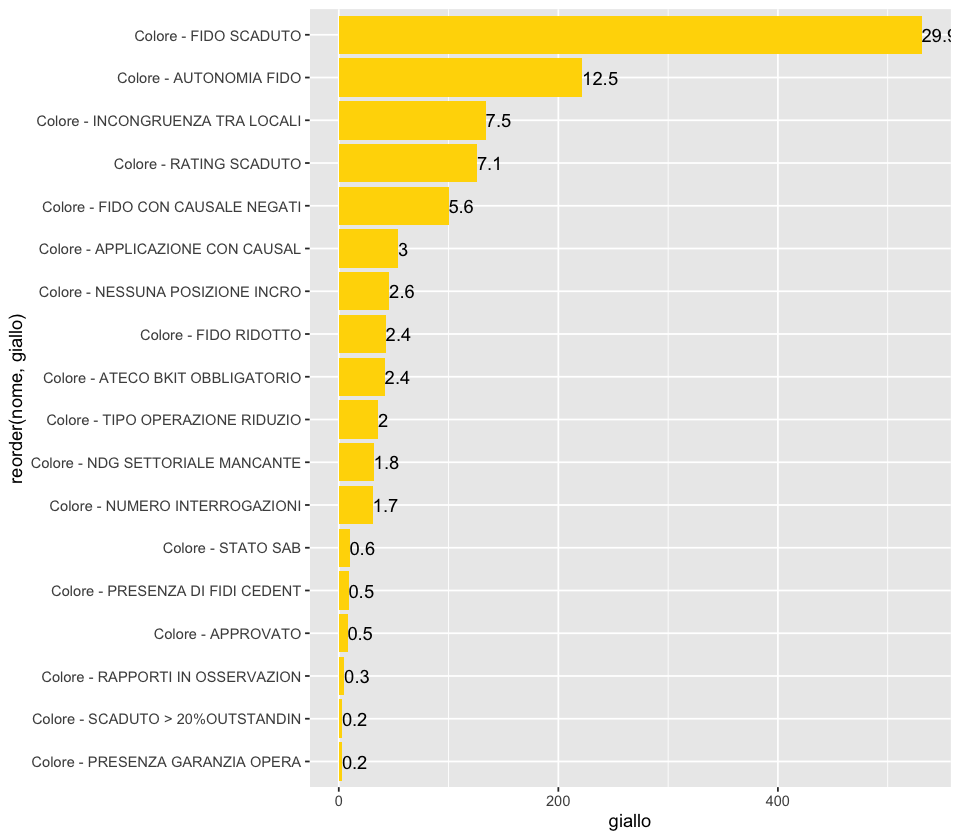

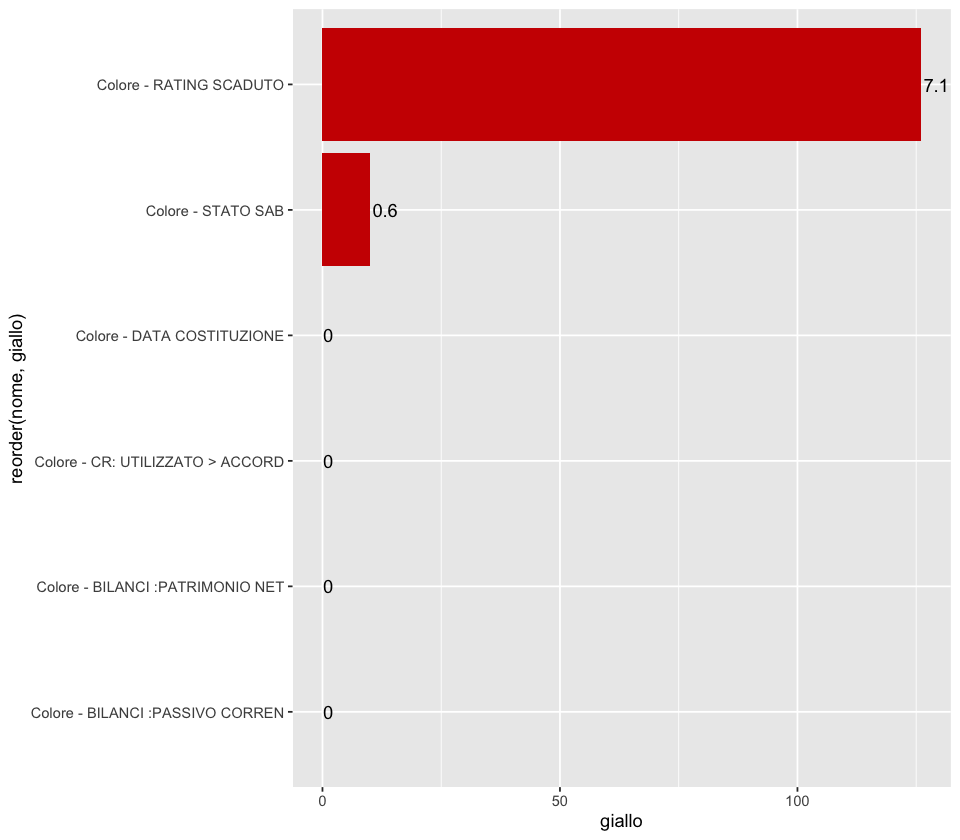

In [1477]:
p<-ggplot(data=dt_count[giallo >0,], 
                      aes(x=reorder(nome,giallo), 
                          y=giallo)) + 
                geom_bar(stat="identity", fill="gold") + coord_flip()   +
                geom_text(aes(label=round(100*giallo/nrow(dt_analisi),1)), hjust=0)

            p

ggsave(
                filename = 'analisi_newverdi_bonis_gialli.png', 
                width = 300, height = 450,
                units = "mm",
                dpi = 320,
                p
            )

p<-ggplot(data=dt_count[rosso >0,], 
                      aes(x=reorder(nome,giallo), 
                          y=giallo)) + 
                geom_bar(stat="identity", fill="red3") + coord_flip()  +
                geom_text(aes(label=round(100*giallo/nrow(dt_analisi),1)), hjust=-0.1)

            p
ggsave(
                filename = 'analisi_newverdi_bonis_rossi.png', 
                width = 300, height = 450,
                units = "mm",
                dpi = 320,
                p
            )

In [1504]:
dt_analisi_rossi <-dt_color_conpred[target == 'DEFAULT' & col_new_vpc == "VERDE"& ESITO_FINALE_VPC == "ROSSO",..cols_color ]

# dt_analisi_giallo <-dt_color_conpred[target == 'DEFAULT' & col_new_vpc == "VERDE"& ESITO_FINALE_VPC == "GIALLO",..cols_color ]

In [1506]:
dt_count_rossi <- rbindlist(lapply(colnames(dt_analisi_rossi), function(col){
    
    data.table(nome = col, rosso = nrow(dt_analisi_rossi[get(col)==5,]) )
}))

# dt_count_gialli <- rbindlist(lapply(colnames(dt_analisi_giallo), function(col){
    
#     data.table(nome = col, giallo = nrow(dt_analisi_giallo[get(col)==4,]) )
# }))
dt_count_rossi[rosso >0,]

nome,rosso
<chr>,<int>
Colore - RATING SCADUTO,1
Colore - BILANCI :PATRIMONIO NET,3
Colore - BILANCI :PASSIVO CORREN,2
Colore - DATA COSTITUZIONE,9


### curve 

In [1191]:
colnames(table_performance)


[1] "pred_vpc"   "DEFAULT"    "OK"         "tot"        "tot_verdi" 
 [6] "lift_verde" "td_foglia"  "def_cum"    "ok_cum"     "tot_cum"   
[11] "recall"     "precision"  "accuracy"   "lift"

In [ ]:
spline_int <- as.data.frame(spline(d$hour, d$impressions))
You need as.data.frame because spline returns a list. Now You can use that new data in the plot with geom_line():

ggplot(d) + 
  geom_point(aes(x = hour, y = impressions, colour = cvr), size = 3) +
  geom_line(data = spline_int, aes(x = x, y = y))

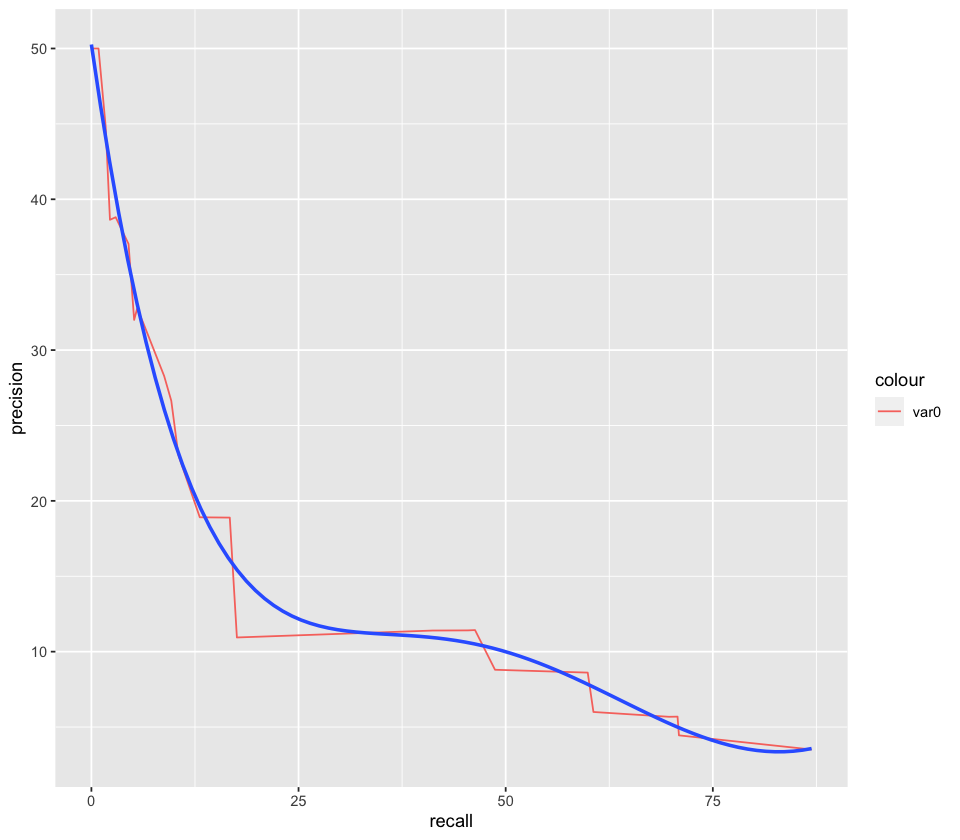

In [1008]:
ggplot(table_performance, aes(recall)) + 
  geom_line(aes(y = precision, colour = "var0")) +
#  geom_line(aes(y = recall, colour = "var1"))+
# stat_smooth(aes(x = pred_vpc, y = recall), method = "lm",
#               formula = y ~ poly(x, 6), se = FALSE) +
stat_smooth(aes(x = recall, y = precision), method = "lm",
              formula = y ~ poly(x, 5), se = FALSE) 

In [ ]:
table(dt_sample_limsoc$new_col_limiti)

In [ ]:
# count_limsoc <- dt_sample_limsoc[,.(vpc_asis_gialli = sum(ESITO_FINALE_VPC=="GIALLO",na.rm = TRUE),
#                                     vpc_asis_verdi = sum(ESITO_FINALE_VPC=="VERDE",na.rm = TRUE),
#                                     vpc_asis_rossi = sum(ESITO_FINALE_VPC=="ROSSO",na.rm = TRUE),
#                                     vpc_prelim_gialli = sum(colore_senza_limsoc=="GIALLO",na.rm = TRUE),
#                                     vpc_prelim_verdi = sum(colore_senza_limsoc=="VERDE",na.rm = TRUE),
#                                     vpc_prelim_rossi = sum(colore_senza_limsoc=="ROSSO",na.rm = TRUE),
#                                     vpc_new_lim_gialli = sum(new_col_limiti=="GIALLO",na.rm = TRUE),
#                                     vpc_new_lim_verdi = sum(new_col_limiti=="VERDE",na.rm = TRUE),
#                                     vpc_new_lim_rossi = sum(new_col_limiti=="ROSSO",na.rm = TRUE)),
#                                     by = pred_vpc]

In [ ]:
count_prelim <-  dt_sample_limsoc[,.(tot_prelim = .N, DEFAULT_prelim = sum(target == "DEFAULT"), OK_prelim = sum(target == "OK")),
                                    by = c('pred_vpc','colore_senza_limsoc')]

count_newlim <-  dt_sample_limsoc[,.(tot_newlim = .N, DEFAULT_newlim = sum(target == "DEFAULT"), OK_newlim = sum(target == "OK")),
                                    by = c('pred_vpc','colore_senza_limsoc')]

In [ ]:
count_newlim

In [ ]:
count_limsoc[,round_pred := round(pred_vpc,4)]
table_performance[,round_pred := round(pred_vpc,4)]

In [ ]:
table_performance <- merge(table_performance,
      count_limsoc,
      by = 'round_pred',
      all.x = TRUE)

In [ ]:
write.xlsx(table_performance,'tabella_performance_smev4.xlsx',row.names = FALSE)

In [ ]:
sum(count_limsoc$vpc_new_lim_verdi,na.rm = TRUE)#[order(pred_vpc)]

In [ ]:
plot(table_performance$lift)

In [ ]:
options(repr.matrix.max.cols=100)
dt_tree_filt <- dt_sample[EWS_ASIS %in% (0:5),]
dt_tree_filt <- dt_tree_filt[,.(DEFAULT = sum(target == "DEFAULT"),OK = sum(target == "OK" ) ),by = pred_vpc][order(pred_vpc)]

In [ ]:
table_performance <- dt_tree_filt[,.(pred_vpc,DEFAULT,OK)]
table_performance[,tot := DEFAULT + OK]
table_performance[, tot_verdi := round(100*cumsum(tot)/sum(tot),2)]
table_performance <- table_performance[order(-pred_vpc)]

table_performance[,td_foglia := round(100*DEFAULT/tot,2)]
table_performance[,def_cum := cumsum(DEFAULT)]
table_performance[,ok_cum := cumsum(OK)]
table_performance[,tot_cum := cumsum(tot)]


#table_performance[,td_cum := def_cum/tot_cum]

table_performance[,recall := round(100*def_cum/sum(DEFAULT),2)]
table_performance[,precision :=  round(100*def_cum/tot_cum,2)]
table_performance[,accuracy :=  round(100*(def_cum+sum(OK) - ok_cum)/sum(tot),2)]
table_performance[,lift := round((def_cum/tot_cum)/(sum(DEFAULT)/sum(tot)),2)]

write.csv(table_performance, 'table_performance_v4.xlsx', row.names= FALSE)

cat('tot default',sum(table_performance$DEFAULT))
cat('\ntot ok',sum(table_performance$OK))
cat('\ntot ',sum(table_performance$tot))
cat('\ntd ',round(100*sum(table_performance$DEFAULT)/sum(table_performance$tot),2))
table_performance

In [ ]:
plot(table_performance$precision~table_performance$recall, type = 'l')

In [ ]:
options(repr.matrix.max.cols=100)
dt_tree_filt_nonclienti <- dt_sample[!(EWS_ASIS %in% (0:5)),]
dt_tree_filt_nonclienti <- dt_tree_filt_nonclienti[,.(DEFAULT = sum(target == "DEFAULT"),OK = sum(target == "OK" ) ),by = pred_vpc][order(pred_vpc)]

In [ ]:
table_performance <- dt_tree_filt_nonclienti[,.(pred_vpc,DEFAULT,OK)]
table_performance[,tot := DEFAULT + OK]
table_performance[, tot_verdi := round(100*cumsum(tot)/sum(tot),2)]
table_performance <- table_performance[order(-pred_vpc)]

table_performance[,td_foglia := round(100*DEFAULT/tot,2)]
table_performance[,def_cum := cumsum(DEFAULT)]
table_performance[,ok_cum := cumsum(OK)]
table_performance[,tot_cum := cumsum(tot)]


#table_performance[,td_cum := def_cum/tot_cum]

table_performance[,recall := round(100*def_cum/sum(DEFAULT),2)]
table_performance[,precision :=  round(100*def_cum/tot_cum,2)]
table_performance[,accuracy :=  round(100*(def_cum+sum(OK) - ok_cum)/sum(tot),2)]
table_performance[,lift := round((def_cum/tot_cum)/(sum(DEFAULT)/sum(tot)),2)]

write.csv(table_performance, 'table_performance_v4.xlsx', row.names= FALSE)

cat('tot default',sum(table_performance$DEFAULT))
cat('\ntot ok',sum(table_performance$OK))
cat('\ntot ',sum(table_performance$tot))
cat('\ntd ',round(100*sum(table_performance$DEFAULT)/sum(table_performance$tot),2))
table_performance

In [180]:
table(round(master_modello[flag_exante == 'NO',]$CR_sconf_acc))


 -10000       0       1       2       3       5 9999999 
  66246   16492      26       6       3       1       7 

In [175]:
table(master_modello[flag_exante == 'NO',]$CR_sconf_acc)


              -10000                    0 1.29984578196361e-07 
               66246                14506                    1 
5.07712663064615e-07 8.98609850561182e-07 9.80540199206547e-07 
                   1                    1                    1 
1.12626437254122e-06 1.14305048168147e-06 1.21655315211963e-06 
                   1                    1                    1 
1.22061819429068e-06 1.28881757431644e-06 1.48629266588884e-06 
                   1                    1                    1 
1.56737355213868e-06 1.59719404949385e-06 1.81122670762454e-06 
                   1                    1                    1 
1.89747919888428e-06 2.33190465308254e-06 2.82123922933148e-06 
                   1                    1                    1 
3.51938441743278e-06 3.70471907115283e-06 3.71097446478471e-06 
                   1                    1                    1 
3.75820698450241e-06 3.83803492611783e-06 3.97203160148342e-06 
                   1                   

In [172]:
table(master_modello$flag_exante)


   NO 
82781 

In [174]:
master_modello[flag_exante == 1,]

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


NUM_PRATICA,PROGRESS_PRATICA,AT_eta_soc,AT_cod_sett,AT_cod_microsett,AT_eta_flag,AT_cod_sett_cedente,AT_cod_microsett_cedente,AT_sett_desc,AT_microsett_desc,⋯,FORMA_GIURIDICA,RAT_delta_t,RAT_andamento,COD_TP_CLI,COD_CARTIPO,XRA_media_sconfino_30gg,XRA_IMP_SCONFINO,XRA_IMP_UTIL_TOT,XRA_NUM_GG_SCONF,flag_exante
<dbl>,<int>,<dbl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


In [198]:
table(dt_sample_limsoc[pred_vpc < 0.02 & target == 'DEFAULT',new_num_limiti])


  3   4   5 
135   4  28 

In [138]:
table_performance <- dt_tree[,.(pred_vpc,DEFAULT,OK,tot)]
table_performance[, tot_verdi := round(100*cumsum(tot)/sum(tot),2)]
table_performance[, lift_verde := round((cumsum(DEFAULT)/cumsum(tot))/(sum(DEFAULT)/sum(tot)),2)]
table_performance <- table_performance[order(-pred_vpc)]

table_performance[,td_foglia := round(100*DEFAULT/tot,2)]
table_performance[,def_cum := cumsum(DEFAULT)]
table_performance[,ok_cum := cumsum(OK)]
table_performance[,tot_cum := cumsum(tot)]


#table_performance[,td_cum := def_cum/tot_cum]

table_performance[,recall := round(100*def_cum/sum(DEFAULT),2)]
table_performance[,precision :=  round(100*def_cum/tot_cum,2)]
table_performance[,accuracy :=  round(100*(def_cum+sum(OK) - ok_cum)/sum(tot),2)]
table_performance[,lift := round((def_cum/tot_cum)/(sum(DEFAULT)/sum(tot)),2)]

write.xlsx(table_performance, 'table_performance_v4.xlsx', row.names= FALSE)

cat('tot default',sum(table_performance$DEFAULT))
cat('\ntot ok',sum(table_performance$OK))
cat('\ntot ',sum(table_performance$tot))
cat('\ntd ',round(100*sum(table_performance$DEFAULT)/sum(table_performance$tot),2))
table_performance[,pred_vpc := as.numeric(pred_vpc)]
table_performance

performance_prelim <- function(dt){
    rbindlist(lapply(c("VERDE","GIALLO","ROSSO"),function(x){
       dt_appo <- dt[colore_senza_limsoc == x,
                 list(colore = x,
                      DEFAULT = nrow(dt[target=='DEFAULT' &colore_senza_limsoc==x ,]),
                      OK = nrow(dt[target=='OK' &colore_senza_limsoc==x ,]),
                      old_tot = nrow(dt[colore_senza_limsoc==x ,]))]
              dt_appo[,old_td := round(100*DEFAULT/old_tot,3)]
       dt_appo[,sample_perc := round(100*old_tot/nrow(dt),3)]
       })
   )
}


performance_newlim <- function(dt){
    rbindlist(lapply(c("VERDE","GIALLO","ROSSO"),function(x){
       dt_appo <- dt[colore_senza_limsoc == x,
                 list(colore = x,
                      DEFAULT = nrow(dt[target=='DEFAULT' &esito_finale_new_lim==x ,]),
                      OK = nrow(dt[target=='OK' &esito_finale_new_lim==x ,]),
                      old_tot = nrow(dt[esito_finale_new_lim==x ,]))]
              dt_appo[,old_td := round(100*DEFAULT/old_tot,3)]
       dt_appo[,sample_perc := round(100*old_tot/nrow(dt),3)]
       })
   )
}

soglia_vg <- 0.015
soglia_gr <- 0.015

dt_sample_small <- merge(dt_sample[,.(ESITO_FINALE_VPC,pred_vpc,target,NUM_PRATICA, PROGRESS_PRATICA)],
                         master_modello[,.(NUM_PRATICA,PROGRESS_PRATICA,DSI_importo_fido_richiesto, DSI_sab,RAT_classe_rating_filt)],
                         by = c('NUM_PRATICA','PROGRESS_PRATICA'),
                         all.x = TRUE)

dt_sample_small[, col_new_vpc := "giallo"]
dt_sample_small[pred_vpc <= soglia_vg, col_new_vpc := "verde"]
dt_sample_small[pred_vpc > soglia_gr, col_new_vpc := "rosso"]

tab_perf <- table_soglie(dt_tree[type != 'other',],soglie = c(soglia_vg,soglia_gr))
setnames(tab_perf, c('DEFAULT',"OK","tot","perc"),paste0("new_", c('default',"ok","tot","perc"))) 

old_perf <-  performance_oldvpc(dt_sample)
setnames(old_perf, c('DEFAULT',"OK"),paste0("old_", c('default',"ok"))) 
#old_perf

nrow(dt_sample_small[col_new_vpc == 'verde',])

perf_raw <- merge(tab_perf,
      old_perf,
      by = 'colore')
perf_raw

dt_sample_limsoc <- merge(dt_sample_small,
                         dt_orig[,.(NUM_PRATICA, PROGRESS_PRATICA,LIMITE_MAX,`Esito - LIMITI SOCIETARI`,`Colore - LIMITI SOCIETARI`, `Esito_final_giallo e Monocontrollo_giallo`)],
                         by =c('NUM_PRATICA', 'PROGRESS_PRATICA'),
                         all.x = TRUE)

dt_sample_limsoc[,new_limiti := LIMITE_MAX]
dt_sample_limsoc[grepl("I",RAT_classe_rating_filt),new_limiti := 500000]

dt_sample_limsoc[DSI_importo_fido_richiesto >new_limiti ,new_col_limiti := "GIALLO"]
dt_sample_limsoc[DSI_importo_fido_richiesto <= new_limiti ,new_col_limiti := "VERDE"]
dt_sample_limsoc[LIMITE_MAX == 0 ,new_col_limiti := "ROSSO"]
dt_sample_limsoc[DSI_importo_fido_richiesto == 0 ,new_col_limiti := "VERDE"]
dt_sample_limsoc[grepl("R",RAT_classe_rating_filt) & RAT_classe_rating_filt!= 'UR',new_col_limiti := "ROSSO"]


 dt_sample_limsoc <- merge(dt_sample_limsoc,
                          dt_orig[, c("NUM_PRATICA","PROGRESS_PRATICA",cols_color), with = FALSE],
                          by =  c("NUM_PRATICA","PROGRESS_PRATICA"),
                           all.x = TRUE)

dt_sample_limsoc[, new_num_limiti := as.numeric(factor(new_col_limiti, levels = c('NERO','GRIGIO','VERDE','GIALLO','ROSSO')))]

cols_color <- c(colnames(dt_orig)[grepl("Colore -",colnames(dt_orig)) & !grepl('LIMITI SOCIETARI',colnames(dt_orig))])
#cols_color

dt_color <- dt_orig[,c("NUM_PRATICA","PROGRESS_PRATICA","ESITO_FINALE_VPC",cols_color), with = FALSE]

dt_color[, (cols_color) := lapply(dt_color[,cols_color, with = FALSE], function(col){
        as.numeric(factor(col, levels = c('NERO','GRIGIO','VERDE','GIALLO','ROSSO')))
})]

dt_color[, col_senzalimiti := do.call(pmax, c(.SD, list(na.rm = TRUE))), .SDcols=cols_color]




dt_sample_limsoc <- merge(dt_sample_limsoc,
                         dt_color[, c("NUM_PRATICA","PROGRESS_PRATICA",'col_senzalimiti')],
                         by = c("NUM_PRATICA","PROGRESS_PRATICA"),
                         all.x = TRUE)
dt_sample_limsoc[col_senzalimiti ==3, colore_senza_limsoc := "VERDE"]
dt_sample_limsoc[col_senzalimiti ==4, colore_senza_limsoc := "GIALLO"]
dt_sample_limsoc[col_senzalimiti ==5, colore_senza_limsoc := "ROSSO"]

dt_sample_limsoc[, esito_finale_new_lim_num := do.call(pmax, c(.SD, list(na.rm = TRUE))), .SDcols=c('col_senzalimiti','new_num_limiti')]

dt_sample_limsoc[esito_finale_new_lim_num ==3, esito_finale_new_lim := "VERDE"]
dt_sample_limsoc[esito_finale_new_lim_num ==4, esito_finale_new_lim := "GIALLO"]
dt_sample_limsoc[esito_finale_new_lim_num ==5, esito_finale_new_lim := "ROSSO"]


table(dt_sample_limsoc$new_col_limiti)
table(dt_sample_limsoc$colore_senza_limsoc)
table(dt_sample_limsoc$ESITO_FINALE_VPC)



source('../../model_functions.R')
performance_oldvpc(dt_sample_limsoc)
performance_prelim(dt_sample_limsoc)
performance_newlim(dt_sample_limsoc)

soglie <- c(0.02,0.05,0.095)
rbindlist(lapply(soglie,function(soglia){
    dt_appo <- dt_sample_limsoc[,.(pred_vpc,target,esito_finale_new_lim_num,new_num_limiti,col_senzalimiti)]
    dt_appo[, tree_col_num := 3]
    dt_appo[pred_vpc > soglia, tree_col_num := 5]
    dt_appo[, col_new_limsoc := do.call(pmax, 
                                        c(.SD, list(na.rm = TRUE))), .SDcols=c('tree_col_num','new_num_limiti')]
    dt_appo[,colore := "VERDE"]
    dt_appo[col_new_limsoc >3,colore := "ROSSO"]
    dt_out <- dt_appo[, .(DEFAULT  = sum(target == "DEFAULT"),
                          OK = sum(target == "OK"),tot = .N), by ='colore']
    dt_out[,soglia := soglia]
    dt_out[,perc_sample := round(100*tot/sum(dt_out$tot),2)]
    dt_out[,td := round(100*DEFAULT/tot,2)]

}))

table_soglie(dt_tree,soglie = c(0.09,0.1))

dt_appo <- dt_sample_limsoc[,.(pred_vpc,target,esito_finale_new_lim_num,new_num_limiti,col_senzalimiti)]
    dt_appo[, tree_col_num := 3]
    dt_appo[pred_vpc > 0.09 & pred_vpc <=0.1 , tree_col_num := 4]
    dt_appo[pred_vpc > 0.1 , tree_col_num := 5]
    dt_appo[, col_new_limsoc := do.call(pmax, 
                                        c(.SD, list(na.rm = TRUE))), .SDcols=c('tree_col_num','new_num_limiti')]
    dt_appo[,colore := "VERDE"]
    dt_appo[col_new_limsoc == 4,colore := "GIALLO"]
    dt_appo[col_new_limsoc == 5,colore := "ROSSO"]
    dt_out <- dt_appo[, .(DEFAULT  = sum(target == "DEFAULT"),
                          OK = sum(target == "OK"),tot = .N), by ='colore']
   # dt_out[,soglia := soglia]
    dt_out[,perc_sample := round(100*tot/sum(dt_out$tot),2)]
    dt_out[,td := round(100*DEFAULT/tot,2)]

dt_out

soglie <- c(0.02,0.05,0.095)
rbindlist(lapply(soglie,function(soglia){table_soglie(dt_tree,soglie = c(soglia,soglia))}))

tot default 581
tot ok 15976
tot  16557
td  3.51

pred_vpc,DEFAULT,OK,tot,tot_verdi,lift_verde,td_foglia,def_cum,ok_cum,tot_cum,recall,precision,accuracy,lift
<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0.67567568,5,5,10,100.00,1.00,50.00,5,5,10,0.86,50.00,96.49,14.25
0.66666667,5,6,11,99.94,0.99,45.45,10,11,21,1.72,47.62,96.48,13.57
0.57777778,4,6,10,99.87,0.98,40.00,14,17,31,2.41,45.16,96.47,12.87
0.55555556,3,6,9,99.81,0.98,33.33,17,23,40,2.93,42.50,96.45,12.11
0.52777778,3,9,12,99.76,0.97,25.00,20,32,52,3.44,38.46,96.42,10.96
0.51515152,9,14,23,99.69,0.97,39.13,29,46,75,4.99,38.67,96.39,11.02
0.41176471,4,10,14,99.55,0.95,28.57,33,56,89,5.68,37.08,96.35,10.57
0.32352941,2,19,21,99.46,0.95,9.52,35,75,110,6.02,31.82,96.25,9.07
0.30952381,4,6,10,99.34,0.95,40.00,39,81,120,6.71,32.50,96.24,9.26


In [233]:
table(round(master_modello_filt$CR_sconf_acc,1),master_modello_filt$target)

         
          DEFAULT    OK
  -10000     2501 63745
  0           318 15950
  0.1          21   139
  0.2           6    34
  0.3           3     8
  0.4           0     9
  0.5           2     3
  0.6           0     5
  0.7           2     4
  0.9           1     5
  1             1     1
  1.1           3     1
  1.2           0     1
  1.3           0     1
  1.5           0     1
  1.7           0     1
  1.8           0     1
  1.9           0     2
  2.4           0     1
  2.5           0     1
  2.6           0     1
  3.4           0     1
  5.2           1     0
  9999999       2     5

In [234]:
appo <- copy(master_modello_filt)

In [235]:
appo[,CR_cluser := 'missing']
appo[CR_sconf_acc == 0,CR_cluser := '0']
appo[CR_sconf_acc > 0 &  CR_sconf_acc< 9999999,CR_cluser := '>0']
appo[CR_sconf_acc == 9999999,CR_cluser := 'INF']

In [236]:
appo[,(def = )]


      0      >0     INF missing 
  14506    2022       7   66246 

## estrazione soglie di taglio nell'albero

In [1246]:
txt <- readr::read_file('output/20220614/tree_sme_V4_1.xml')

In [ ]:
library(stringr)

In [1265]:
##CR
lista_raw <- unlist(str_extract_all(gsub('"',"",txt), 'field=CR_sconf_acc.+/>'))
lista_soglie_cr <- gsub('field=',"",lista_raw)
lista_soglie_cr <- gsub('operator=',"",lista_soglie_cr)
lista_soglie_cr <- gsub('value=',"",lista_soglie_cr)
lista_soglie_cr <- gsub('/>',"",lista_soglie_cr)
lista_soglie_cr <- gsub('greaterOrEqual',">=",lista_soglie_cr)
lista_soglie_cr <- gsub('lessThan',"<",lista_soglie_cr)

data.table(lista_soglie_cr)

lista_soglie_cr
<chr>
CR_sconf_acc >= 4.31783980431744
CR_sconf_acc >= 0.115427272367631
CR_sconf_acc >= 0.0435503864163834
CR_sconf_acc < 0.0435503864163834
CR_sconf_acc < -5000
CR_sconf_acc_mlt < -5000
CR_sconf_acc >= -5000
CR_sconf_acc_mlt >= -5000
CR_sconf_acc < 0.115427272367631


In [1264]:
##BIL_Oneri_ebitda
lista_raw <- unlist(str_extract_all(gsub('"',"",txt), 'field=BIL_onerifin_ebitda.+/>'))
lista_soglie_oneri <- gsub('field=',"",lista_raw)
lista_soglie_oneri <- gsub('operator=',"",lista_soglie_oneri)
lista_soglie_oneri <- gsub('value=',"",lista_soglie_oneri)
lista_soglie_oneri <- gsub('/>',"",lista_soglie_oneri)
lista_soglie_oneri <- gsub('greaterOrEqual',">=",lista_soglie_oneri)
lista_soglie_oneri <- gsub('lessThan',"<",lista_soglie_oneri)
data.table(lista_soglie_oneri)

lista_soglie_oneri
<chr>
BIL_onerifin_ebitda >= 206
BIL_onerifin_ebitda >= 417
BIL_onerifin_ebitda < -3.5
BIL_onerifin_ebitda >= -3.5
BIL_onerifin_ebitda >= 225.5
BIL_onerifin_ebitda < 225.5
BIL_onerifin_ebitda < 417
BIL_onerifin_ebitda < 206
BIL_onerifin_ebitda < 124.5


In [1266]:
##BIL_PFN_ebitda
lista_raw <- unlist(str_extract_all(gsub('"',"",txt), 'field=BIL_PFN_Ebitda.+/>'))
lista_soglie_pfn <- gsub('field=',"",lista_raw)
lista_soglie_pfn <- gsub('operator=',"",lista_soglie_pfn)
lista_soglie_pfn <- gsub('value=',"",lista_soglie_pfn)
lista_soglie_pfn <- gsub('/>',"",lista_soglie_pfn)
lista_soglie_pfn <- gsub('greaterOrEqual',">=",lista_soglie_pfn)
lista_soglie_pfn <- gsub('lessThan',"<",lista_soglie_pfn)

data.table(lista_soglie_pfn)

lista_soglie_pfn
<chr>
BIL_PFN_Ebitda < 0.858581405191874
BIL_PFN_Ebitda >= 0.688470728793309
BIL_PFN_Ebitda < 0.688470728793309
BIL_PFN_Ebitda < -12.8178733031674
BIL_PFN_Ebitda >= -12.8178733031674
BIL_PFN_Ebitda >= 0.858581405191874
BIL_PFN_Ebitda >= 16.2989926739927
BIL_PFN_Ebitda >= -0.529046345509327
BIL_PFN_Ebitda < -0.529046345509327


In [1255]:
unlist(str_extract_all(gsub('"',"",txt), 'field=CR_sconf_acc.+/>'))

[1] "field=CR_sconf_acc operator=greaterOrEqual value=4.31783980431744/>"    
 [2] "field=CR_sconf_acc operator=greaterOrEqual value=0.115427272367631/>"   
 [3] "field=CR_sconf_acc operator=greaterOrEqual value=0.0435503864163834/>"  
 [4] "field=CR_sconf_acc operator=lessThan value=0.0435503864163834/>"        
 [5] "field=CR_sconf_acc operator=lessThan value=-5000/>"                     
 [6] "field=CR_sconf_acc_mlt operator=lessThan value=-5000/>"                 
 [7] "field=CR_sconf_acc operator=greaterOrEqual value=-5000/>"               
 [8] "field=CR_sconf_acc_mlt operator=greaterOrEqual value=-5000/>"           
 [9] "field=CR_sconf_acc operator=lessThan value=0.115427272367631/>"         
[10] "field=CR_sconf_acc operator=lessThan value=4.31783980431744/>"          
[11] "field=CR_sconf_acc operator=lessThan value=-5000/>"                     
[12] "field=CR_sconf_acc operator=greaterOrEqual value=-5000/>"               
[13] "field=CR_sconf_acc operator=lessThan value=-5000/>"                     
[14] "field=CR_sconf_acc operator=greaterOrEqual value=4.65363943841676e-05/>"
[15] "field=CR_sconf_acc operator=lessThan value=4.65363943841676e-05/>"      
[16] "field=CR_sconf_acc operator=greaterOrEqual value=-5000/>"

## analisi variabili

ETA,tot,ok,DEFAULT,td,color,td_medio,perc_sample
<dbl>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>
0.0,1,1,0,0.0000000,B,3.456107,0.001
0.3,100,100,0,0.0000000,B,3.456107,0.121
27.0,892,887,5,0.5605381,B,3.456107,1.078
29.0,783,778,5,0.6385696,B,3.456107,0.946
24.0,1168,1159,9,0.7705479,B,3.456107,1.411
0.2,113,112,1,0.8849558,B,3.456107,0.137
21.0,1325,1313,12,0.9056604,B,3.456107,1.601
23.0,1107,1096,11,0.9936766,B,3.456107,1.337
26.0,978,967,11,1.1247444,B,3.456107,1.181



   -1     0   0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9     1     2 
   29     1    80   113   100   115   143   289   298   381   350  4539  6734 
    3     4     5     6     7     8     9    10    11    12    13    14    15 
 4580  4565  4186  3692  3385  3262  2685  2385  2225  2163  2036  1931  1718 
   16    17    18    19    20    21    22    23    24    25    26    27    28 
 1715  1617  1650  1488  1501  1325  1293  1107  1168  1044   978   892   888 
   29    30 
  783 13335 

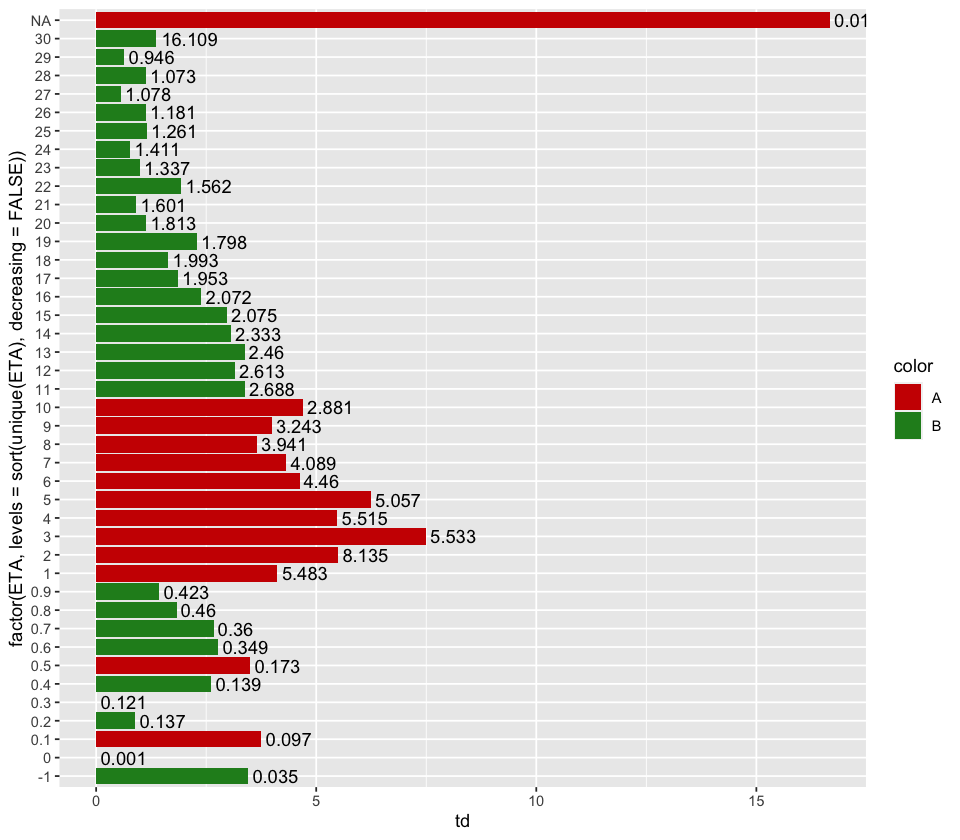

In [541]:
require(arules)
dt_appo <- copy(master_modello_filt) 

 dt_appo[AT_eta_soc >= 1,ETA :=round(AT_eta_soc)]
dt_appo[AT_eta_soc < 1 &AT_eta_soc >0  ,ETA :=round(AT_eta_soc,1)]
dt_appo[AT_eta_soc < 0,ETA :=-1]
dt_appo[AT_eta_soc > 30,ETA :=30]

df <- dt_appo[, 
.( tot = .N, ok = sum(target !='DEFAULT'), DEFAULT = sum(target =='DEFAULT'), 
                td = 100*sum(target =='DEFAULT')/.N), by = ETA]
df[,color := 'A']
df[td < 100*sum(DEFAULT)/sum(tot), color := 'B']

df[,td_medio := 100*sum(DEFAULT)/sum(tot)]
df[,perc_sample :=round(100*tot/sum(tot),3)]
df[order(td)]


p<-ggplot(data=df, aes(x=factor(ETA, levels= sort(unique(ETA), decreasing = FALSE)), y=td, fill = color)) +
        geom_bar(stat="identity") + coord_flip()+ 
        scale_fill_manual(values=c("A"='red3', 'B' = "forestgreen"))+
        geom_text(aes(label=perc_sample), hjust=-0.1)
p

 ggsave(
        filename = 'plot_eta.png', 
        width = 400, height = 500,
        units = "mm",
        dpi = 320,
        p
    )
table(dt_appo$ETA)

In [910]:
nrow(dt_appo)

[1] 82781

In [543]:
dt_appo[,flag_anno := ]

NUM_PRATICA,PROGRESS_PRATICA,AT_eta_soc,AT_cod_sett,AT_cod_microsett,AT_eta_flag,AT_cod_sett_cedente,AT_cod_microsett_cedente,AT_sett_desc,AT_microsett_desc,⋯,RAT_delta_t,RAT_andamento,COD_TP_CLI,COD_CARTIPO,XRA_media_sconfino_30gg,XRA_IMP_SCONFINO,XRA_IMP_UTIL_TOT,XRA_NUM_GG_SCONF,flag_exante,ETA
<dbl>,<int>,<dbl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
102230026,1,4.72,SOFTW00,SOFTW02,FALSE,MACCH00,MACCH01,Software e Servizi IT,Software e Servizi IT - Software,⋯,0.0,Stabile,NA,NA,0.0000,0,0,0,NO,5
102230029,2,7.81,SERVA00,SERVA01,FALSE,NA,NA,Servizi di assistenza sanitaria,Servizi di assistenza sanitaria,⋯,NA,NA,NA,NA,0.0000,0,0,0,NO,8
102230034,1,17.98,COSTR00,COSTR02,TRUE,NA,NA,Costruzioni - Edilizia,Costruzioni - Edilizia - Demolizione e preparazione edifici,⋯,0.0,Stabile,NA,NA,0.0000,0,0,0,NO,18
102230035,1,19.03,ASERV00,ASERV04,TRUE,NA,NA,Altri servizi,Altri servizi - Noleggio e leasing,⋯,0.0,NA,NA,NA,0.0000,0,0,0,NO,19
103230027,1,17.65,FARMD00,FARMD01,TRUE,FARMD00,FARMD02,Farmaceutica e Biotecnologie - Distribuzione,Farmaceutica e Biotecnologie - Distribuzione - Dettaglio,⋯,NA,NA,NA,NA,0.0000,0,0,0,NO,18
103230031,1,41.02,AGRIC00,AGRIC01,TRUE,NA,NA,"Agricoltura, pesca e allevamento","Agricoltura, pesca e allevamento - Agricoltura",⋯,0.1,Non Utilizzabile UR,NA,NA,0.0000,0,0,0,NO,30
103230033,1,14.54,ALIMD00,ALIMD02,TRUE,NA,NA,Alimentare e bevande - Distribuzione,Alimentare&Bevande - Distribuzione - Ingrosso,⋯,0.0,Peggiorato,NA,NA,0.0000,0,0,0,NO,15
103230034,1,31.10,ALIMP00,ALIMP03,TRUE,NA,NA,Alimentare e bevande - Produzione,Alimentare&Bevande - Produzione - Alimentare,⋯,0.1,Peggiorato,NA,NA,0.0000,0,0,0,NO,30
103230039,1,8.01,TRASS00,TRASS10,FALSE,NA,NA,Trasporti - Servizi,Trasporti - Servizi - Merci su strada,⋯,0.1,Non Utilizzabile UR,NA,NA,0.0000,0,0,0,NO,8


pdf_ebi,tot,ok,DEFAULT,td,color,td_medio,perc_sample
<dbl>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>
-19.0,20,20,0,0.0000000,B,3.456107,0.024
-14.0,34,34,0,0.0000000,B,3.456107,0.041
-16.0,26,26,0,0.0000000,B,3.456107,0.031
-11.0,60,60,0,0.0000000,B,3.456107,0.072
15.0,67,67,0,0.0000000,B,3.456107,0.081
-18.0,22,22,0,0.0000000,B,3.456107,0.027
-10.0,87,87,0,0.0000000,B,3.456107,0.105
-21.0,8,8,0,0.0000000,B,3.456107,0.010
-20.0,20,20,0,0.0000000,B,3.456107,0.024


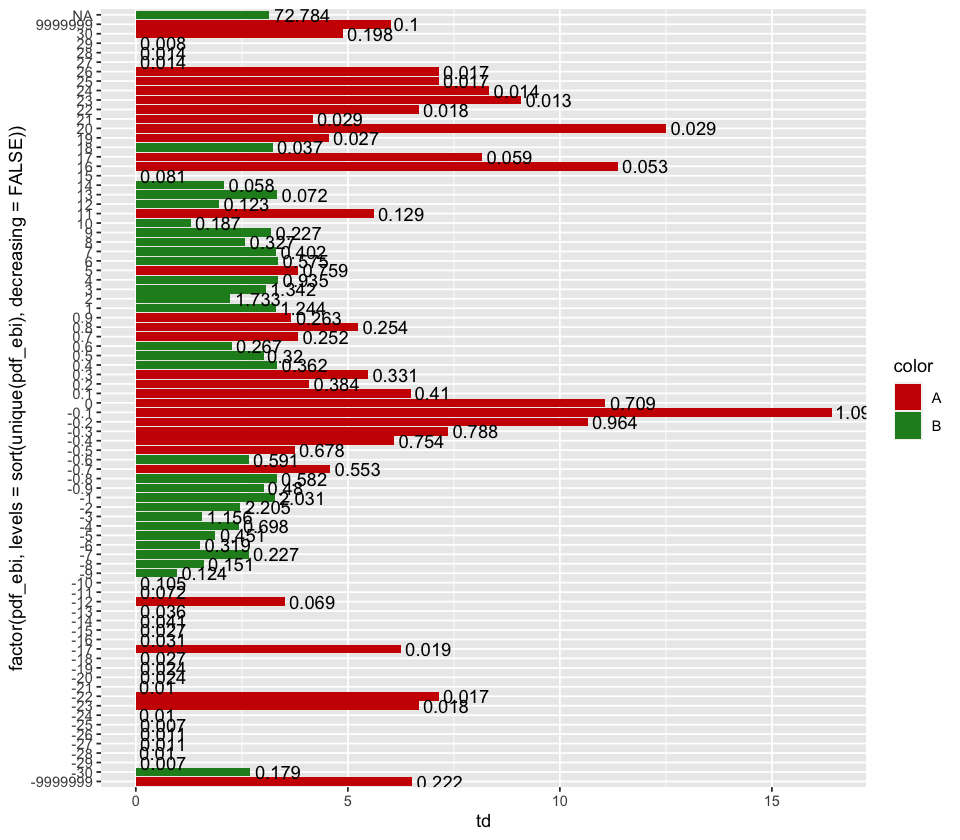

In [786]:



dt_appo[BIL_PFN_Ebitda >= 1 & BIL_PFN_Ebitda < -50,pdf_ebi :=round(BIL_PFN_Ebitda)]
dt_appo[BIL_PFN_Ebitda <= -1 & BIL_PFN_Ebitda > -50,pdf_ebi :=round(BIL_PFN_Ebitda)]
dt_appo[BIL_PFN_Ebitda < 1 &BIL_PFN_Ebitda >0  ,pdf_ebi :=round(BIL_PFN_Ebitda,1)]
dt_appo[BIL_PFN_Ebitda < 0 &BIL_PFN_Ebitda >-1  ,pdf_ebi :=round(BIL_PFN_Ebitda,1)]
dt_appo[BIL_PFN_Ebitda >30 & BIL_PFN_Ebitda< 2000,pdf_ebi :=30]
dt_appo[BIL_PFN_Ebitda < -30 & BIL_PFN_Ebitda  > -2000,pdf_ebi :=-30]
dt_appo[BIL_PFN_Ebitda > 2000,pdf_ebi :=9999999]
dt_appo[BIL_PFN_Ebitda <  -2000,pdf_ebi :=-9999999]

df <- dt_appo[, 
.( tot = .N, ok = sum(target !='DEFAULT'), DEFAULT = sum(target =='DEFAULT'), 
                td = 100*sum(target =='DEFAULT')/.N), by = pdf_ebi]
df[,color := 'A']
df[td < 100*sum(DEFAULT)/sum(tot), color := 'B']

df[,td_medio := 100*sum(DEFAULT)/sum(tot)]
df[,perc_sample :=round(100*tot/sum(tot),3)]
df[order(td)]


p<-ggplot(data=df, aes(x=factor(pdf_ebi, levels= sort(unique(pdf_ebi), decreasing = FALSE)), y=td, fill = color)) +
        geom_bar(stat="identity") + coord_flip()+ 
        scale_fill_manual(values=c("A"='red3', 'B' = "forestgreen"))+
        geom_text(aes(label=perc_sample), hjust=-0.1)
p

 ggsave(
        filename = 'plot_pfn_ebitda.png', 
        width = 400, height = 500,
        units = "mm",
        dpi = 320,
        p
    )

classi_pfn_ebitda,tot,ok,DEFAULT,td,color,td_medio,perc_sample
<dbl>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>
NA,59074,57232,1842,3.118123,B,3.456107,71.362
4.5,768,742,26,3.385417,B,3.456107,0.928
3.5,7267,7007,260,3.577818,A,3.456107,8.779
10.0,2979,2869,110,3.692514,A,3.456107,3.599
-1.0,12693,12070,623,4.908217,A,3.456107,15.333


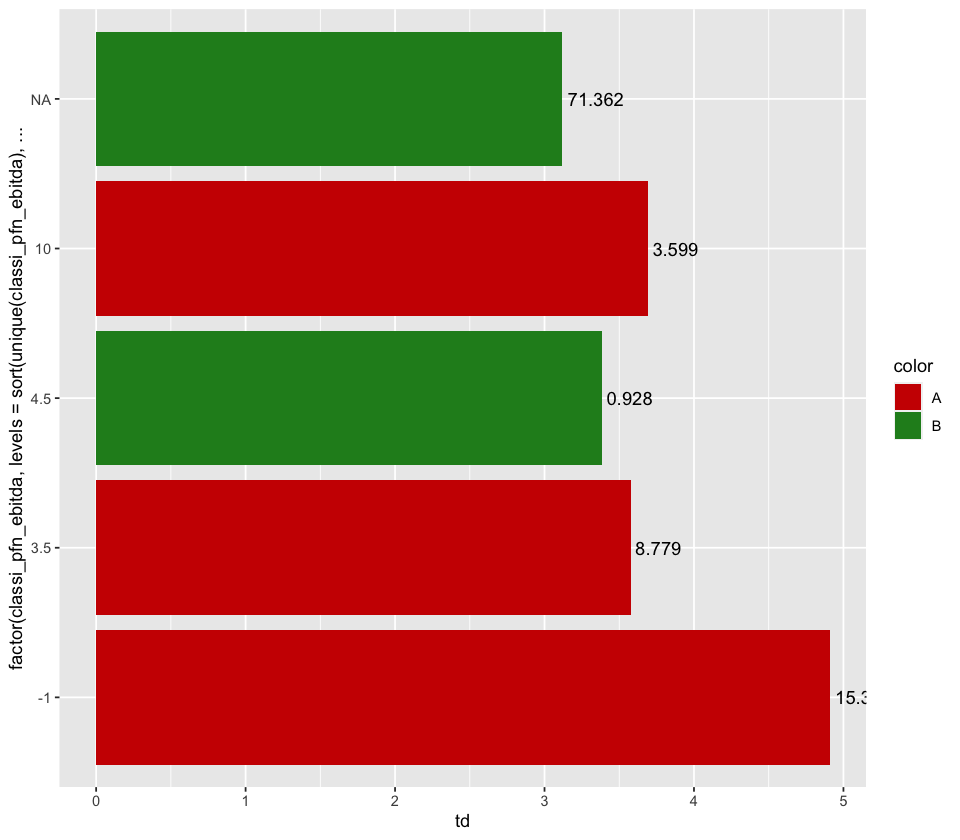

In [928]:



dt_appo[BIL_PFN_Ebitda < 0 ,classi_pfn_ebitda  := -1]
dt_appo[BIL_PFN_Ebitda >= 0 & BIL_PFN_Ebitda <3.5,classi_pfn_ebitda  := 3.5]
dt_appo[BIL_PFN_Ebitda >= 3.5 & BIL_PFN_Ebitda < 4.5,classi_pfn_ebitda  := 4.5]
dt_appo[BIL_PFN_Ebitda >= 4.5,classi_pfn_ebitda  := 10]


df <- dt_appo[, 
.( tot = .N, ok = sum(target !='DEFAULT'), DEFAULT = sum(target =='DEFAULT'), 
                td = 100*sum(target =='DEFAULT')/.N), by = classi_pfn_ebitda]
df[,color := 'A']
df[td < 100*sum(DEFAULT)/sum(tot), color := 'B']

df[,td_medio := 100*sum(DEFAULT)/sum(tot)]
df[,perc_sample :=round(100*tot/sum(tot),3)]
df[order(td)]


p<-ggplot(data=df, aes(x=factor(classi_pfn_ebitda, levels= sort(unique(classi_pfn_ebitda), decreasing = FALSE)), y=td, fill = color)) +
        geom_bar(stat="identity") + coord_flip()+ 
        scale_fill_manual(values=c("A"='red3', 'B' = "forestgreen"))+
        geom_text(aes(label=perc_sample), hjust=-0.1)
p

 ggsave(
        filename = 'plot_pfn_ebitda_classi.png', 
        width = 400, height = 500,
        units = "mm",
        dpi = 320,
        p
    )

In [792]:
dt_appo[CR_sconf_acc <  -100,sconf_acc := 'missing']
dt_appo[CR_sconf_acc > 100,sconf_acc := 'inf']
dt_appo[CR_sconf_acc == 0,sconf_acc := '0']
dt_appo[CR_sconf_acc > 0 & CR_sconf_acc<=100,sconf_acc := '>0']

In [793]:
table(dt_appo$sconf_acc,useNA = 'always')


      0      >0     inf missing    <NA> 
  14506    2022       7   66246       0 

sconf_acc,tot,ok,DEFAULT,td,color,td_medio,perc_sample
<chr>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>
0,14506,14312,194,1.337378,B,3.456107,17.523
missing,66246,63745,2501,3.775322,A,3.456107,80.026
>0,2022,1858,164,8.110781,A,3.456107,2.443
inf,7,5,2,28.571429,A,3.456107,0.008


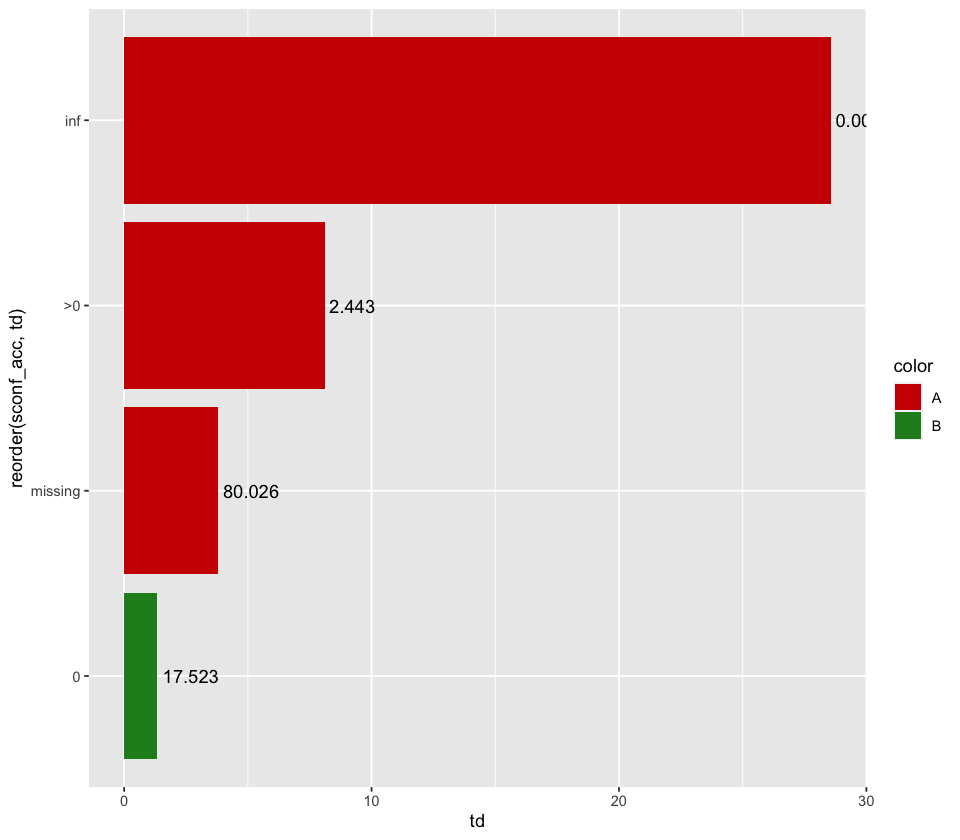

In [796]:
df <- dt_appo[, 
.( tot = .N, ok = sum(target !='DEFAULT'), DEFAULT = sum(target =='DEFAULT'), 
                td = 100*sum(target =='DEFAULT')/.N), by = sconf_acc]
df[,color := 'A']
df[td < 100*sum(DEFAULT)/sum(tot), color := 'B']

df[,td_medio := 100*sum(DEFAULT)/sum(tot)]
df[,perc_sample :=round(100*tot/sum(tot),3)]
df[order(td)]


p<-ggplot(data=df, aes(x=reorder(sconf_acc,td), y=td, fill = color)) +
                geom_bar(stat="identity") + coord_flip()  + 
                scale_fill_manual(values=c("A"='red3', 'B' = "forestgreen"))+
                geom_text(aes(label=perc_sample), hjust=-0.1)
            p
 ggsave(
        filename = 'plot_sconf_acc.png', 
        width = 400, height = 500,
        units = "mm",
        dpi = 320,
        p
    )

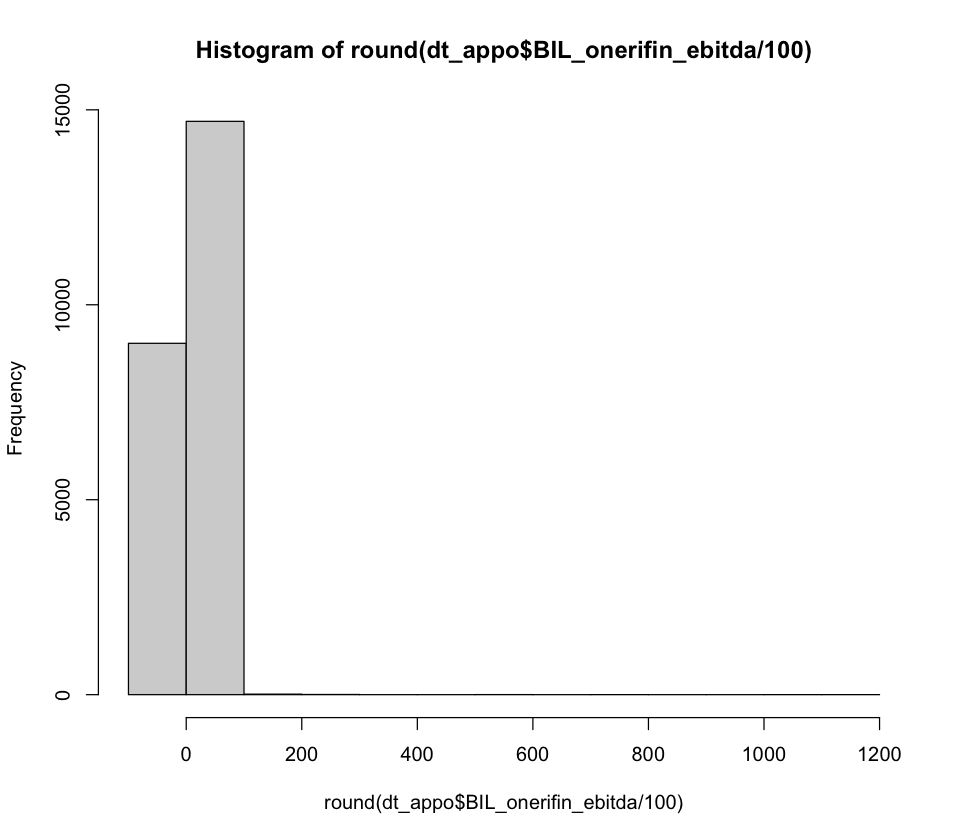

In [920]:
dt_appo[BIL_onerifin_ebitda

In [922]:
lista_master$bil

NUM_PRATICA,PROGRESS_PRATICA,BIL_fatturato,BIL_pat_netto,BIL_PFN_Ebitda,BIL_onerifin_ebitda,BIL_delta_fatturato,BIL_delta_pat_netto
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
102230026,1,-0.005128205,28888251,1.87179487,1106,0,529
102230029,2,NA,NA,NA,NA,NA,NA
102230034,1,0.014492754,28888251,-0.42753623,582,0,67
102230035,1,0.000000000,28888251,-0.39053254,143,0,90
103230027,1,0.008021390,28888251,-1.73529412,330,NA,NA
103230030,1,NA,NA,NA,NA,NA,NA
103230031,1,0.195652174,28888251,3.41304348,391,0,13
103230033,1,0.197452229,28888251,5.68789809,256,0,27
103230034,1,0.230769231,28888251,-3.23076923,1353,0,35


In [ ]:

EW

In [1484]:

cat("EWS    ",round(100*nrow(master_modello[is.na(EWS_ASIS),])/nrow(master_modello),1))
cat("\nRATING    ",round(100*nrow(master_modello[is.na(RAT_classe_rating_filt),])/nrow(master_modello),1))
cat("\nCR    ",round(100*nrow(master_modello[is.na(CR_accordato),])/nrow(master_modello),1))

EWS     76.6
RATING     65.6
CR     78.9